# View all Fors2 spectra rescaled

Implement this fit using this `fors2pcigale`package

- Author Sylvie Dagoret-Campagne
- Afflilation : IJCLab/IN2P3/CNRS
- Organisation : LSST-DESC
- creation date : 2024-02-04
- last update : 2024-02-04


Use ``pcigale`` python environnement

## Import

In [1]:
import h5py
import pandas as pd
import numpy as np
import os
import re
from astropy.io import fits
from astropy.table import Table
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.colors as colors
import matplotlib.cm as cmx
import collections
from collections import OrderedDict
import re
import matplotlib.gridspec as gridspec
from sklearn.gaussian_process import GaussianProcessRegressor, kernels

/var/folders/79/hrybm_4s0zjd4jsb7lp_trhh0000gp/T/ipykernel_36455/3674730952.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

### Fors2 and Starlight

In [3]:
from fors2pcigale.fors2starlightio import Fors2DataAcess

## Fors2 data

In [4]:
fors2 = Fors2DataAcess()

/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


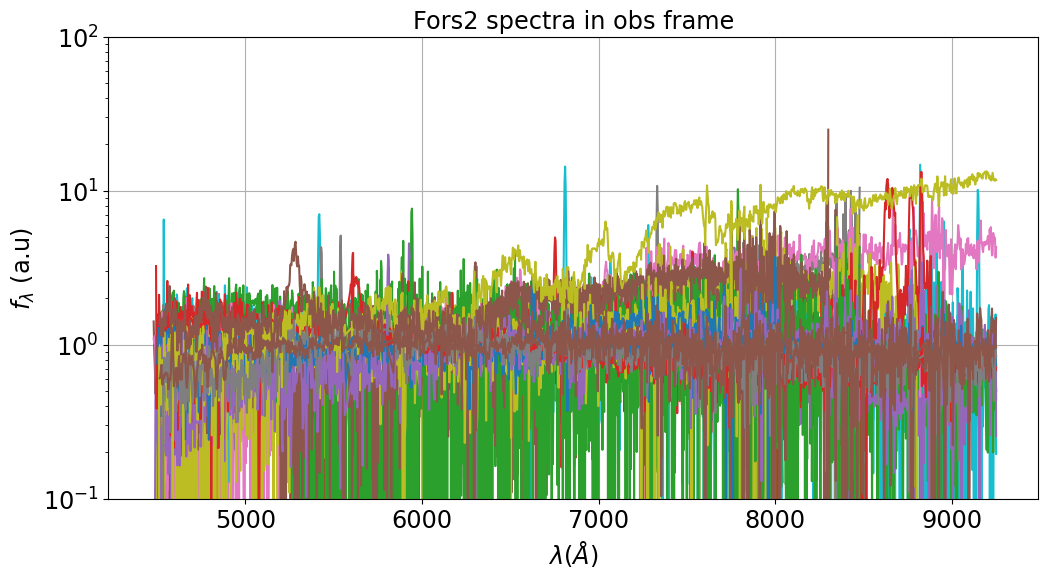

In [5]:
fors2.plot_allspectra()

In [6]:
fors2_tags = fors2.get_list_of_groupkeys()
len(fors2_tags)

550

In [7]:
list_of_fors2_attributes = fors2.get_list_subgroup_keys()
print(list_of_fors2_attributes)

['CLASS_STAR', 'DECJ2000', 'EXTINCTION_g', 'EXTINCTION_i', 'EXTINCTION_r', 'EXTINCTION_u', 'FLUXERR_GAAP_H', 'FLUXERR_GAAP_J', 'FLUXERR_GAAP_Ks', 'FLUXERR_GAAP_Y', 'FLUXERR_GAAP_Z', 'FLUXERR_GAAP_g', 'FLUXERR_GAAP_i', 'FLUXERR_GAAP_r', 'FLUXERR_GAAP_u', 'FLUX_GAAP_H', 'FLUX_GAAP_J', 'FLUX_GAAP_Ks', 'FLUX_GAAP_Y', 'FLUX_GAAP_Z', 'FLUX_GAAP_g', 'FLUX_GAAP_i', 'FLUX_GAAP_r', 'FLUX_GAAP_u', 'FLUX_RADIUS', 'ID', 'KIDS_TILE', 'MAGERR_GAAP_H', 'MAGERR_GAAP_J', 'MAGERR_GAAP_Ks', 'MAGERR_GAAP_Y', 'MAGERR_GAAP_Z', 'MAGERR_GAAP_g', 'MAGERR_GAAP_i', 'MAGERR_GAAP_r', 'MAGERR_GAAP_u', 'MAG_GAAP_H', 'MAG_GAAP_J', 'MAG_GAAP_Ks', 'MAG_GAAP_Y', 'MAG_GAAP_Z', 'MAG_GAAP_g', 'MAG_GAAP_i', 'MAG_GAAP_r', 'MAG_GAAP_u', 'Nsp', 'RAJ2000', 'RT', 'RV', 'Rmag', 'Z_B', 'Z_ML', 'asep_galex', 'asep_kids', 'dec', 'dec_galex', 'eRV', 'fuv_flux', 'fuv_fluxerr', 'fuv_mag', 'fuv_magerr', 'lines', 'name', 'num', 'nuv_flux', 'nuv_fluxerr', 'nuv_mag', 'nuv_magerr', 'ra', 'ra_galex', 'redshift']


## View all spectra

/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


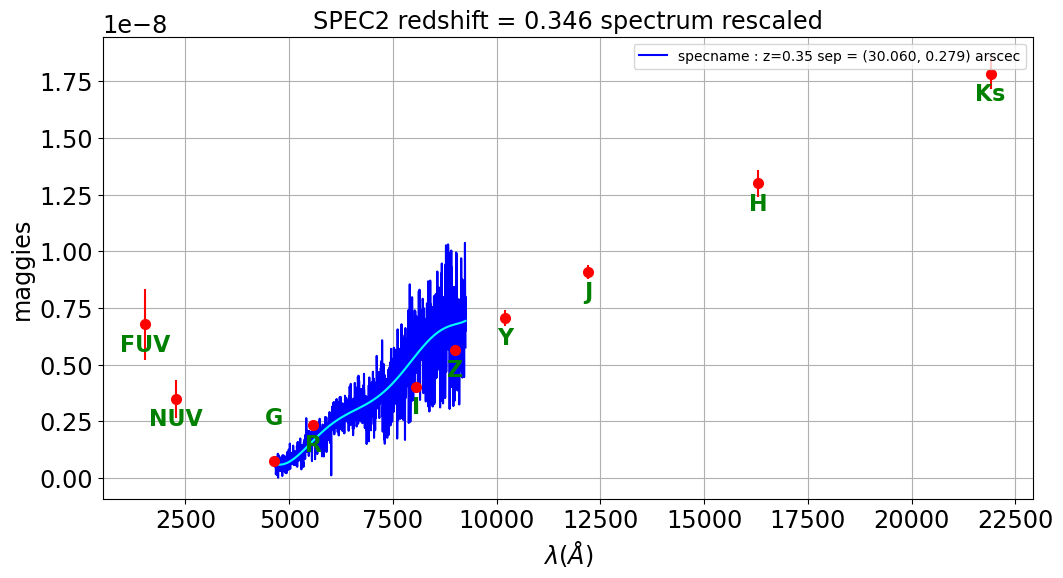

/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


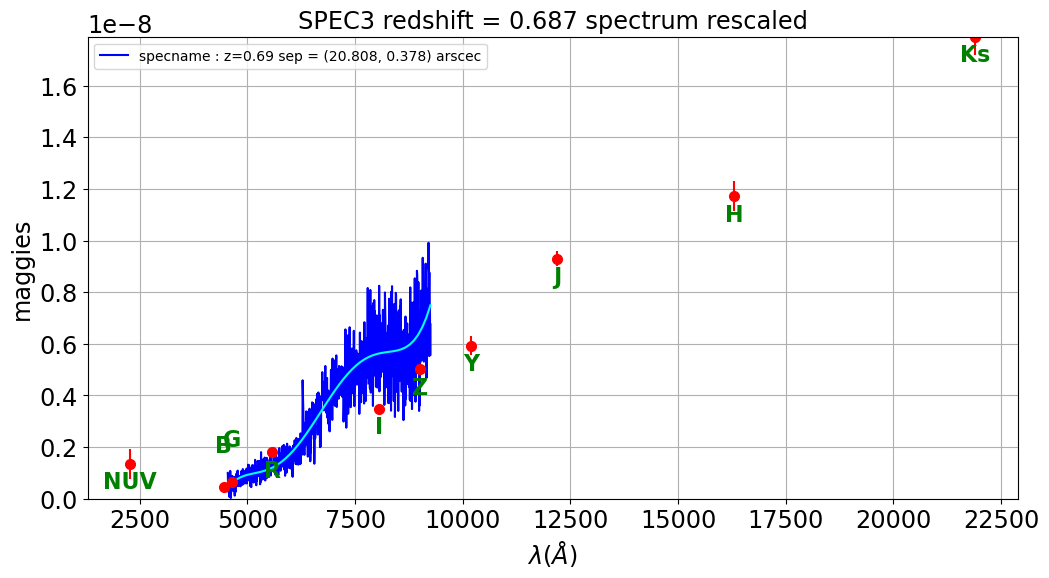

/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


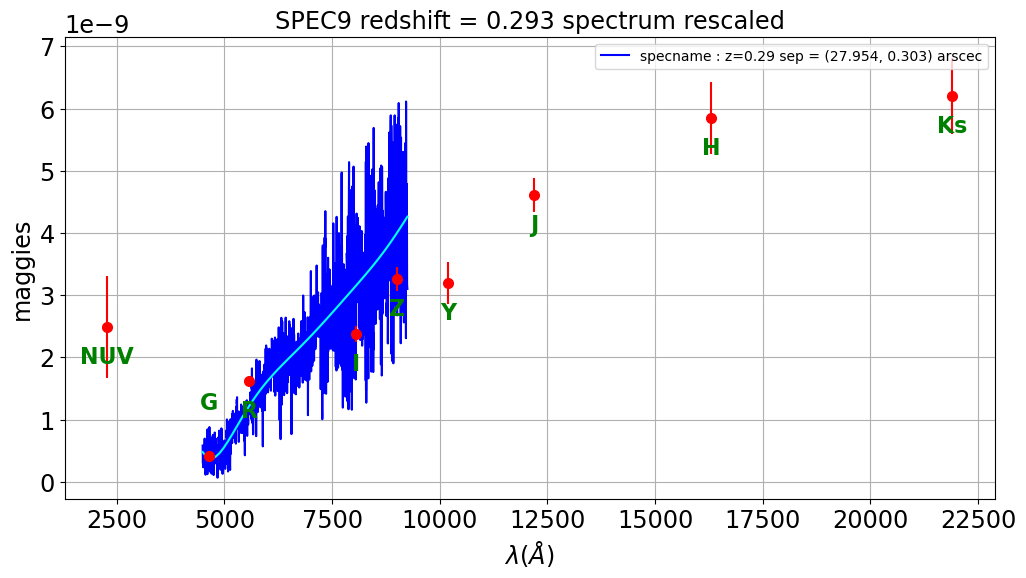

/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


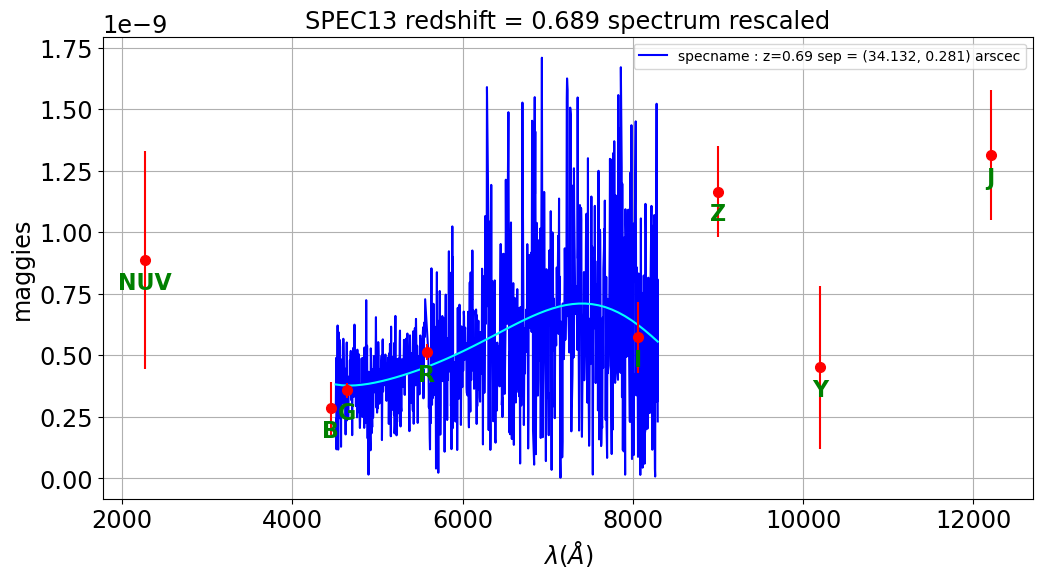

/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


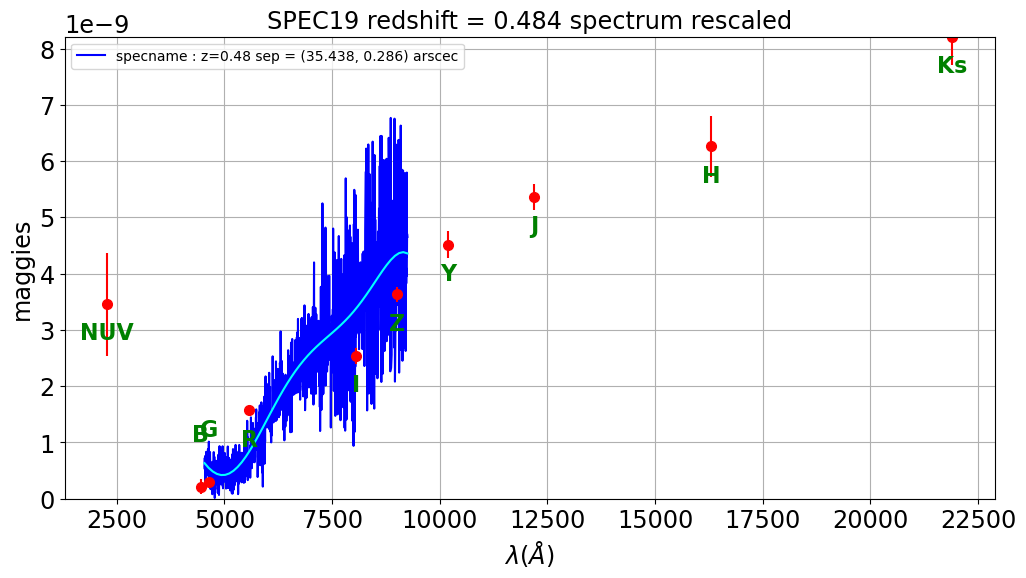

/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


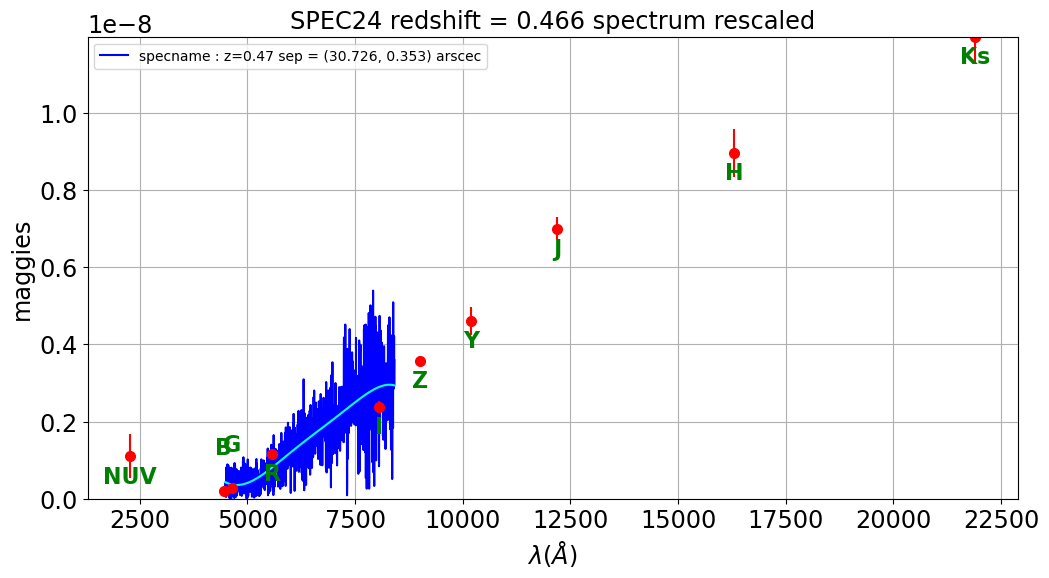

/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


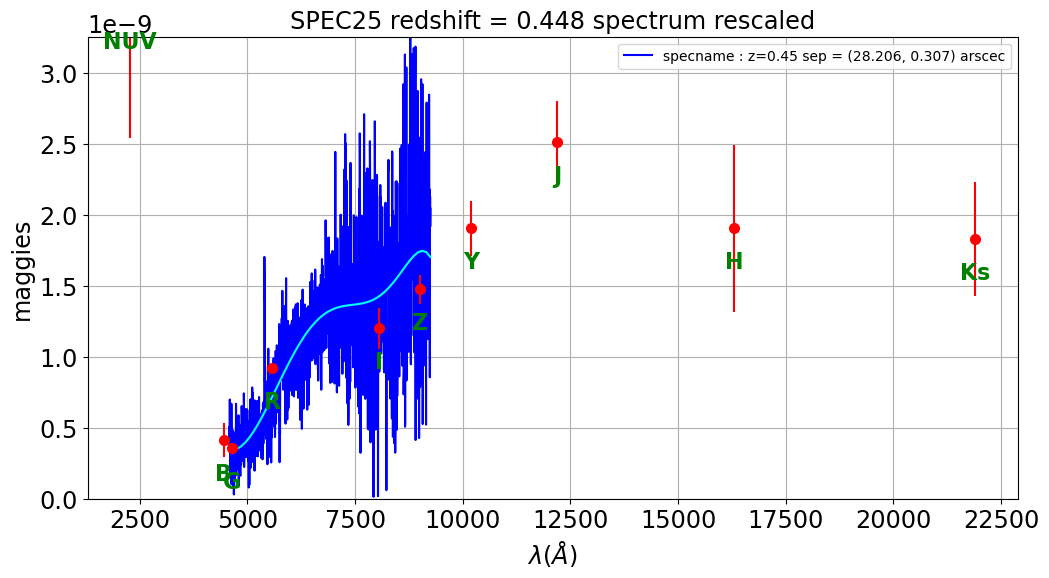

/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


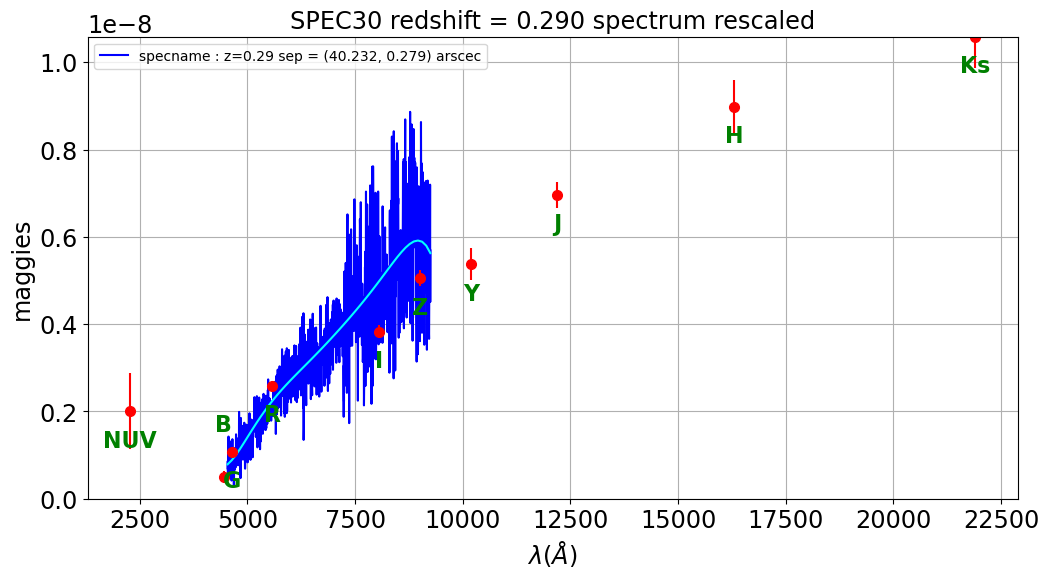

/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


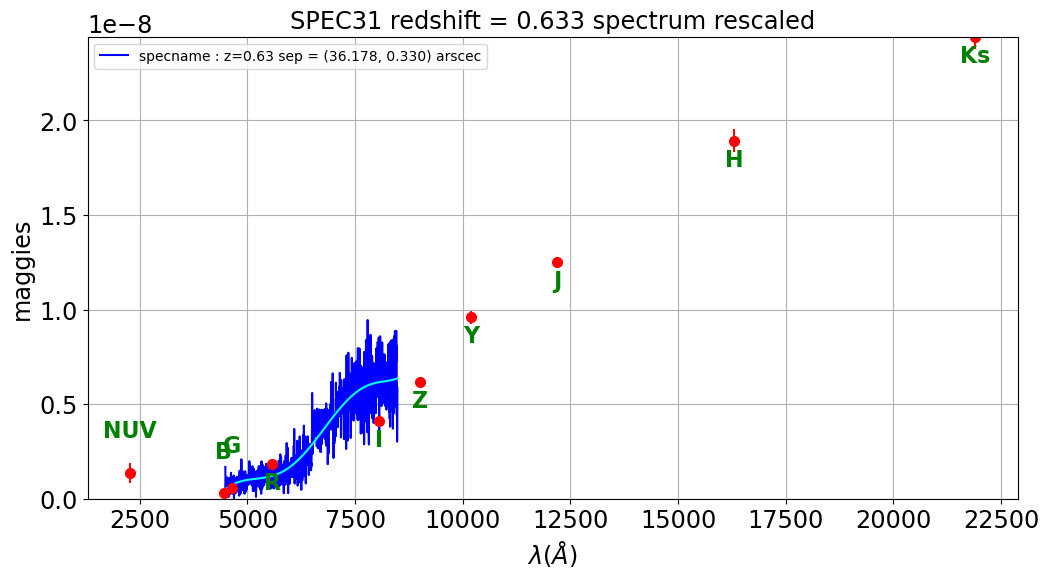

/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


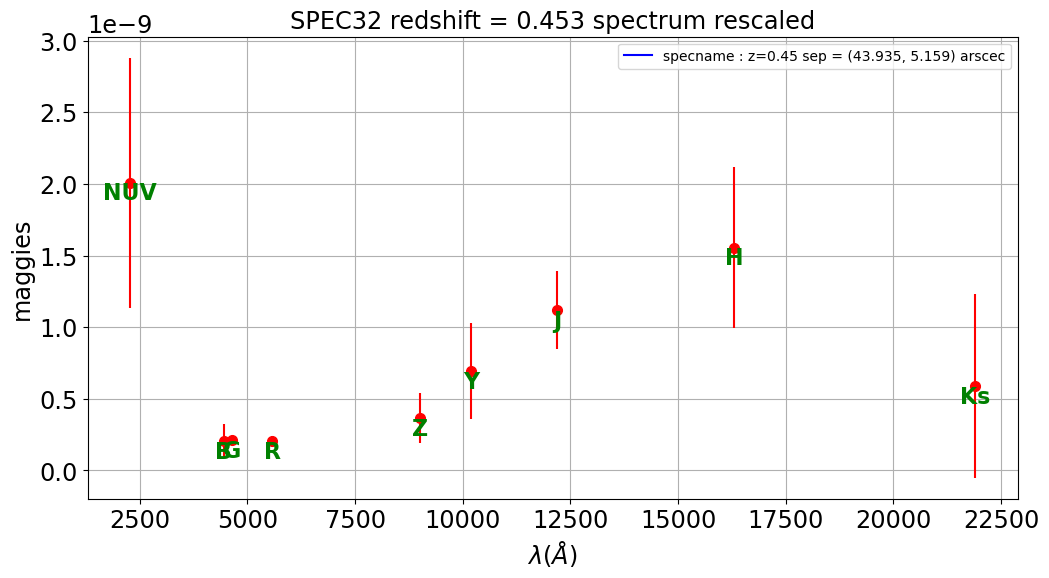

/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


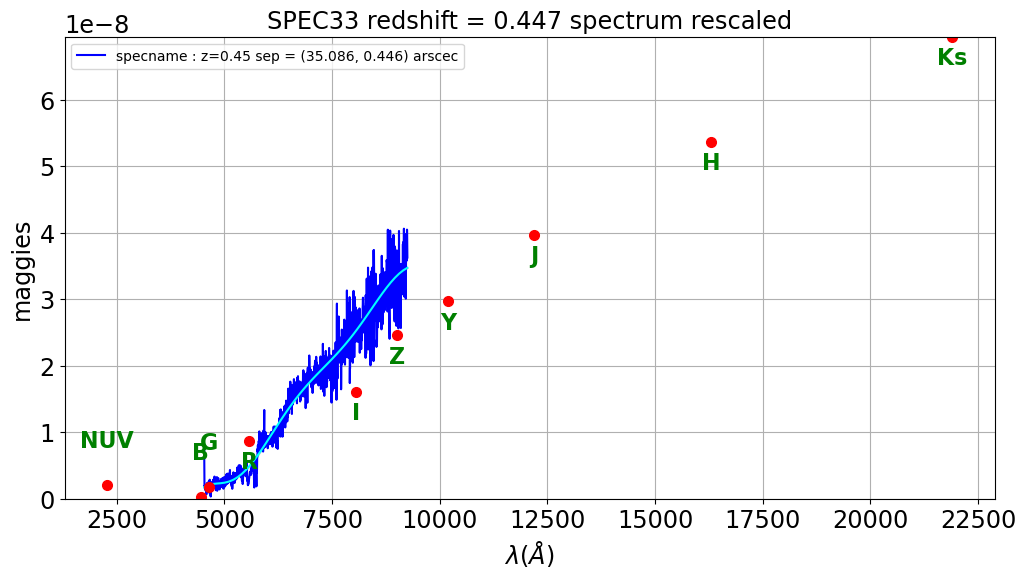

/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


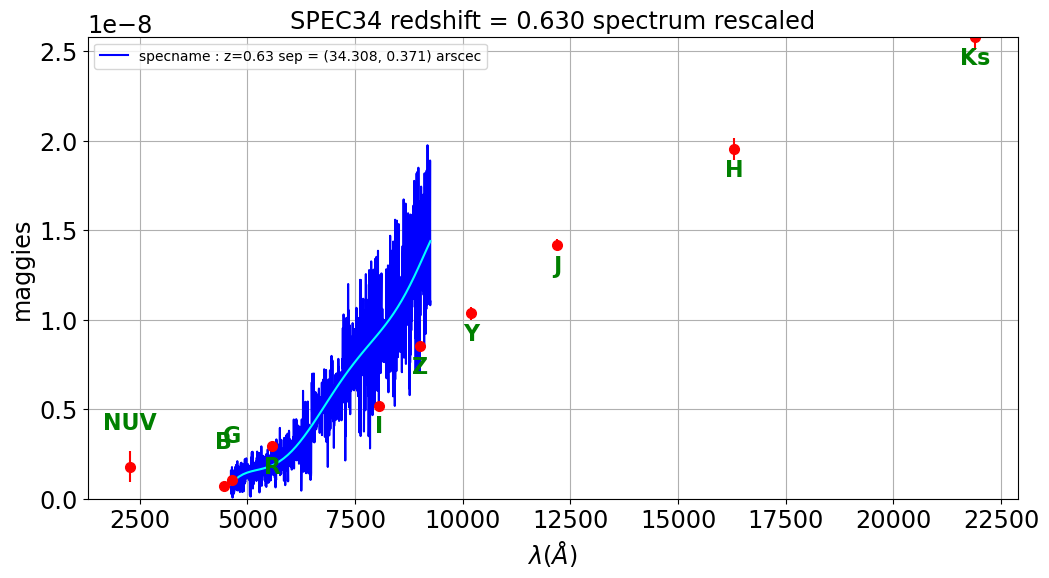

/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


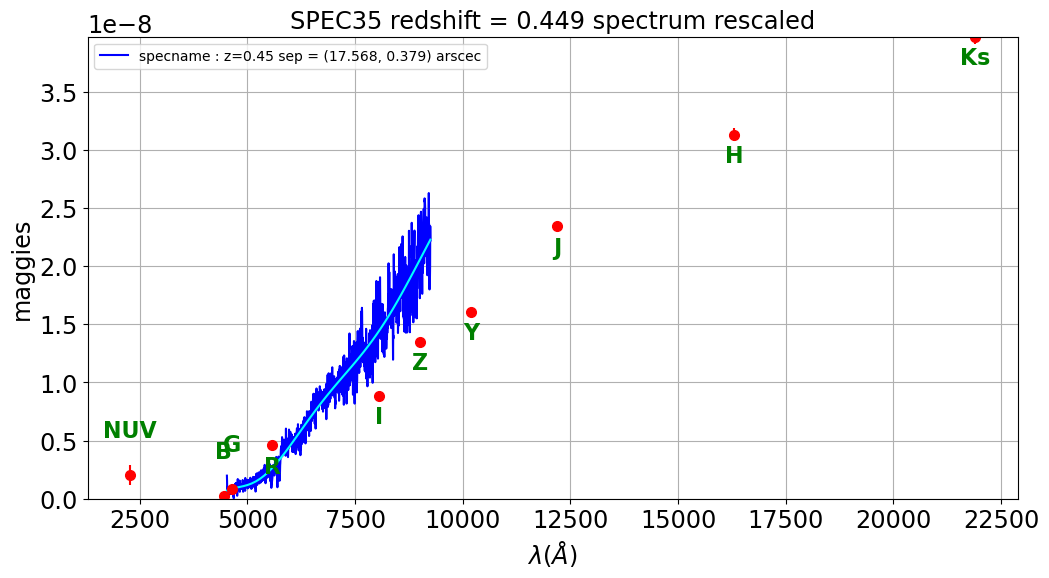

/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


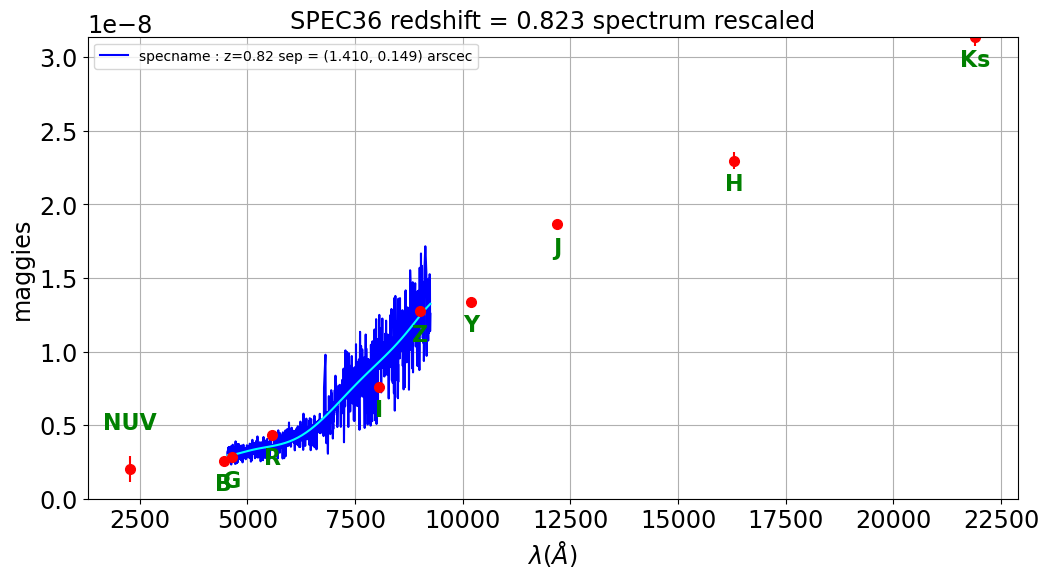

/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


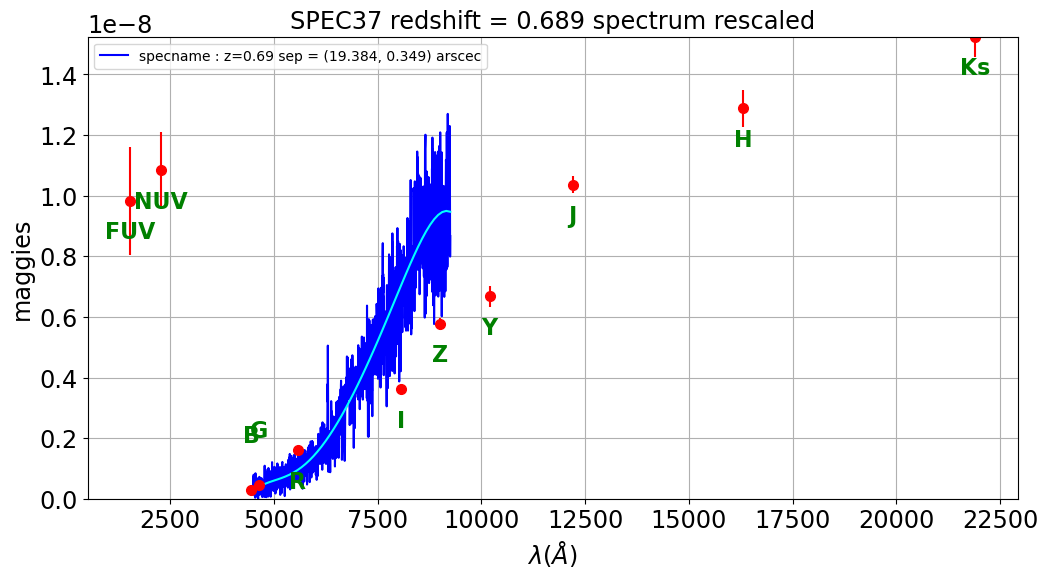

/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


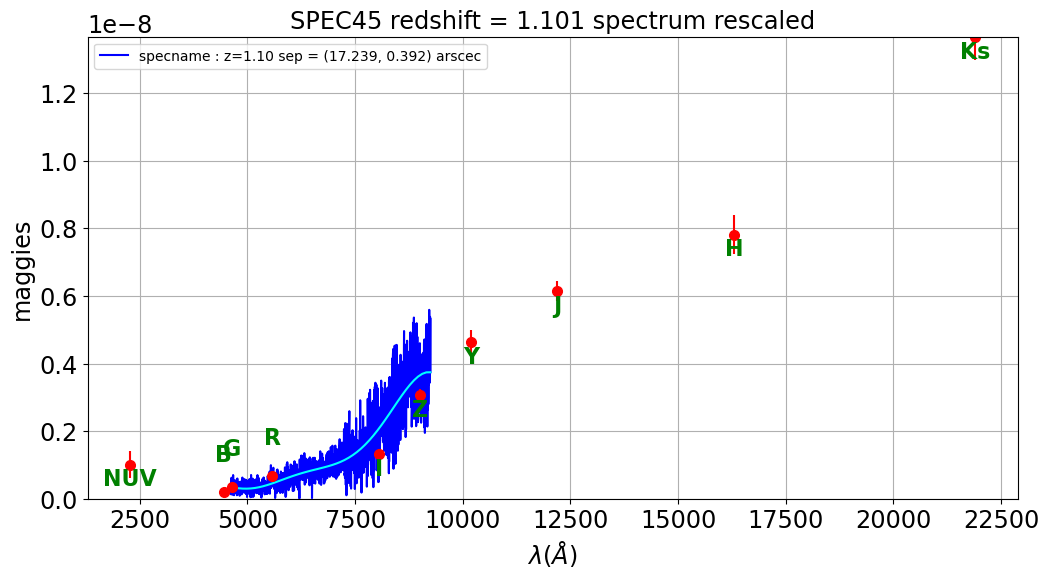

/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


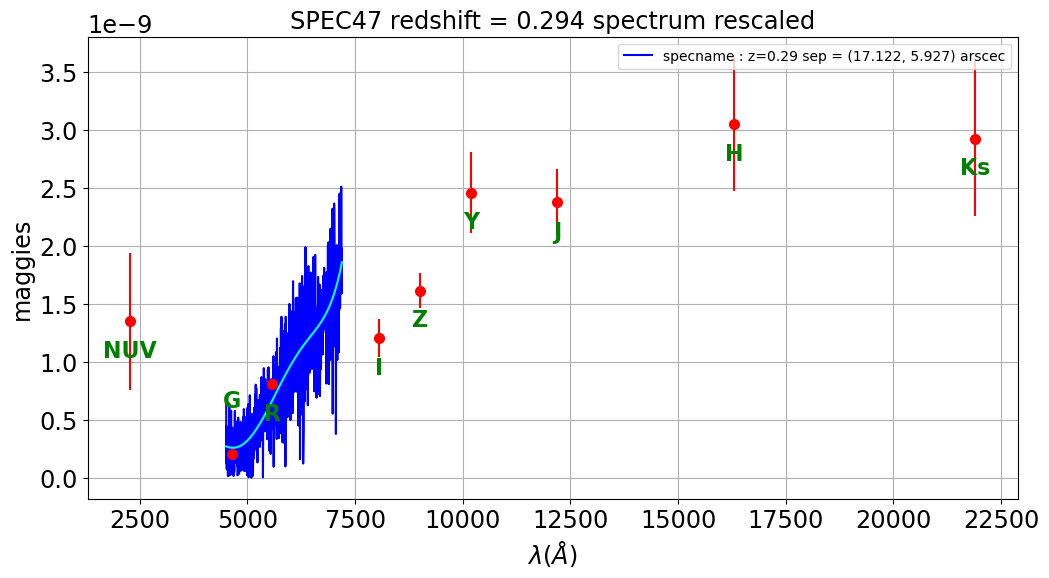

/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


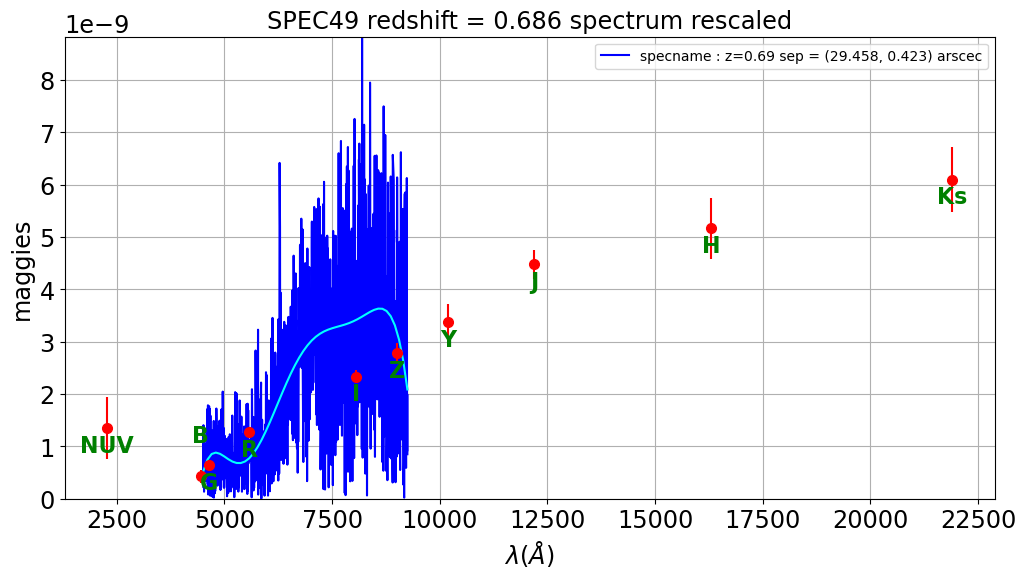

/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


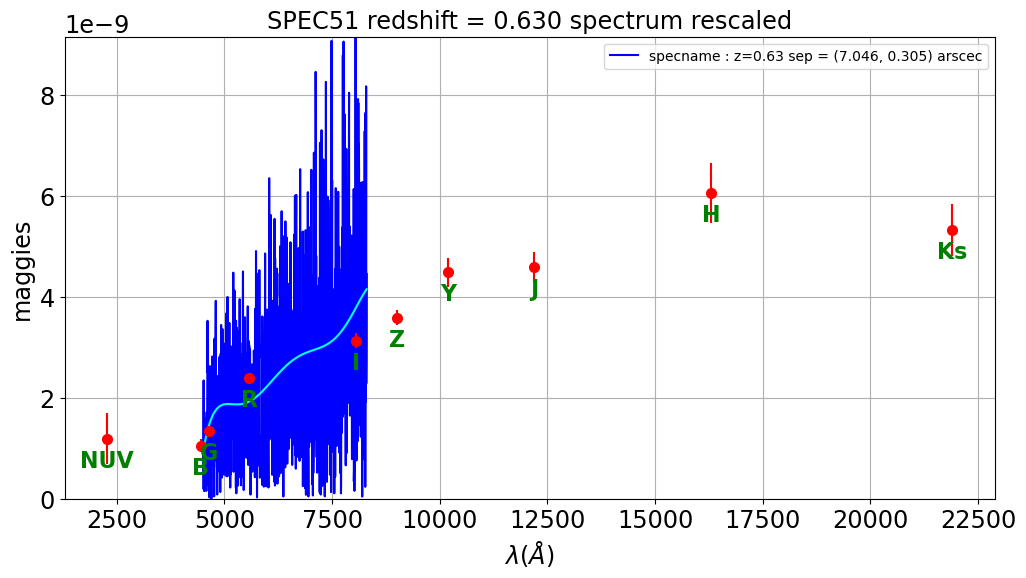

/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


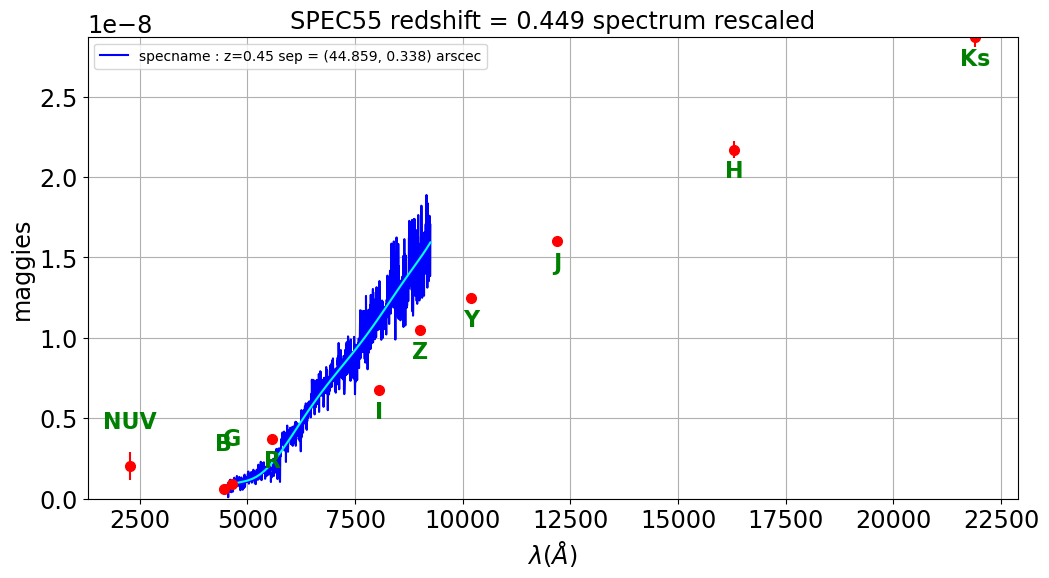

/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


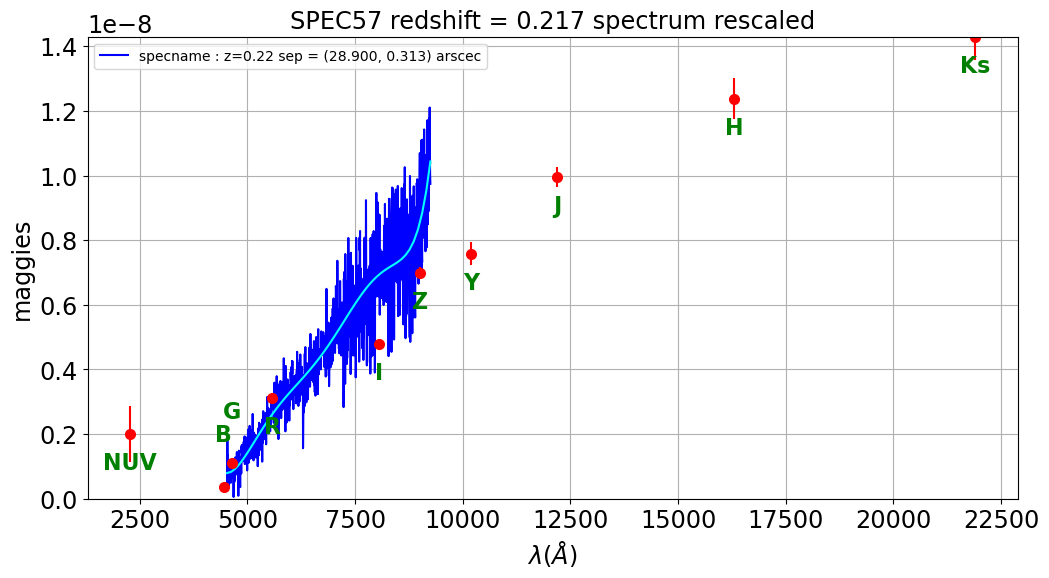

/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


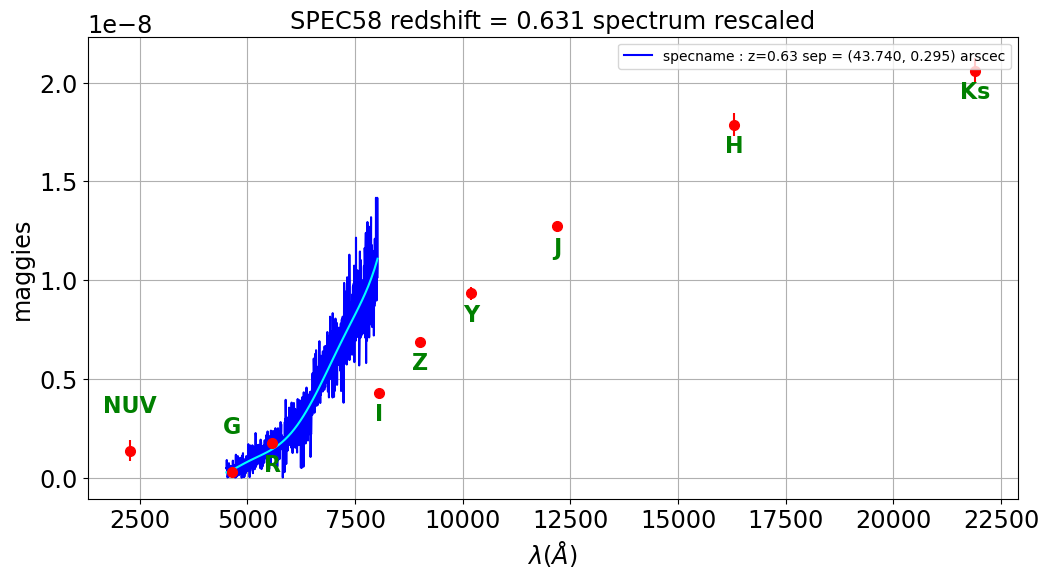

/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


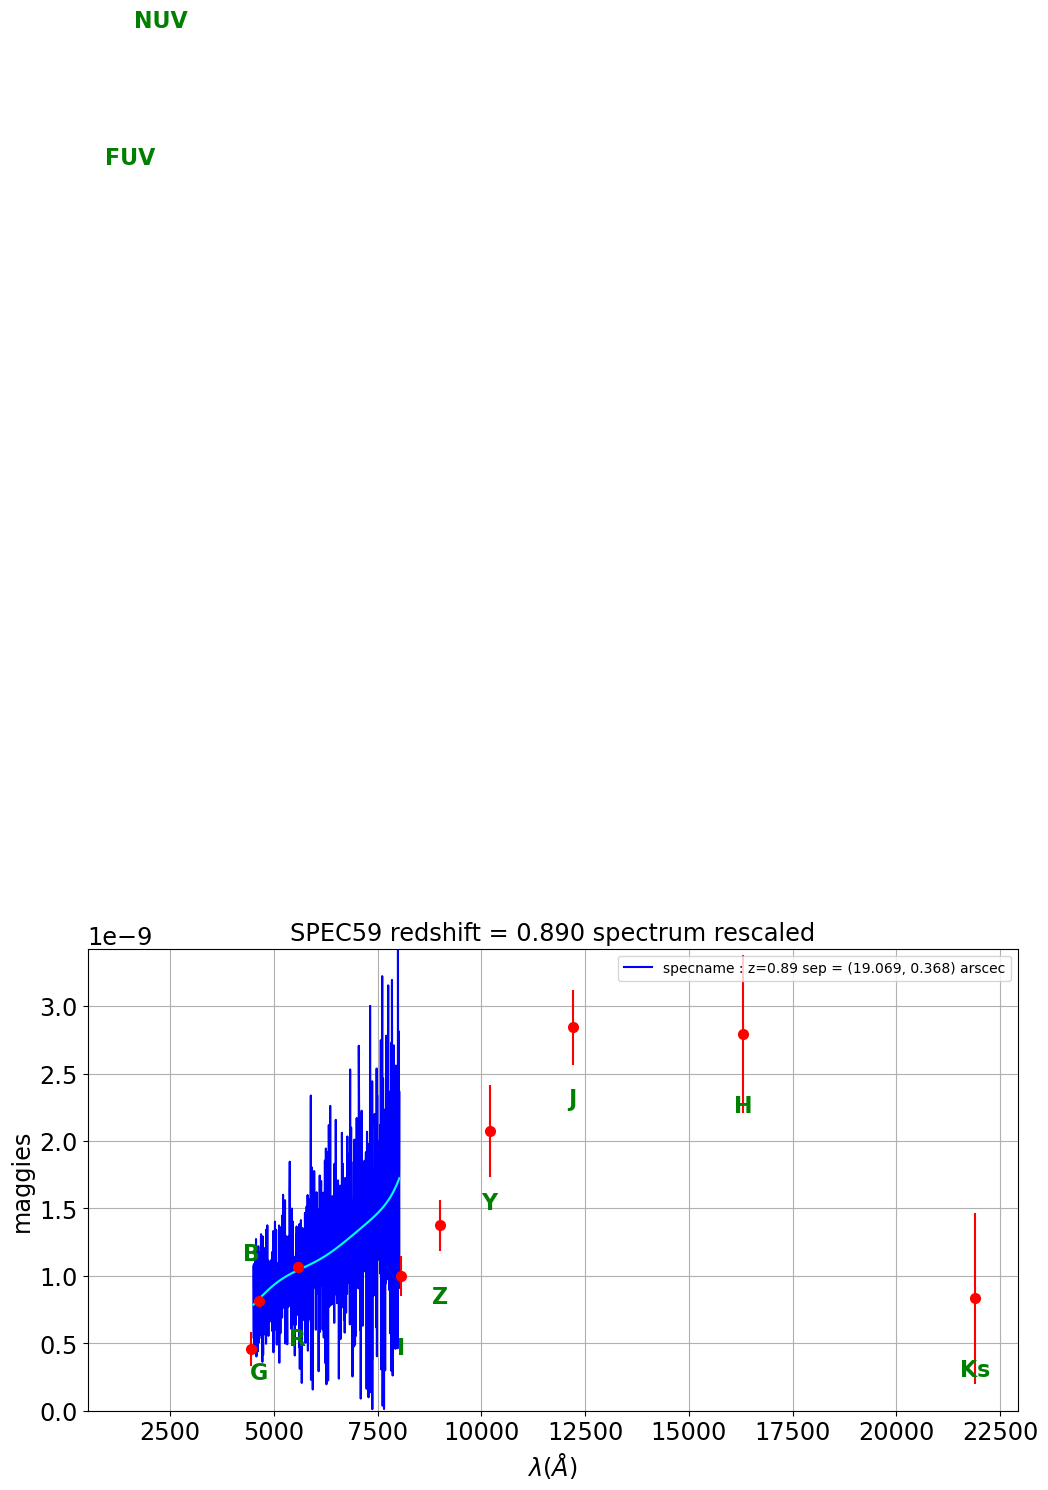

/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


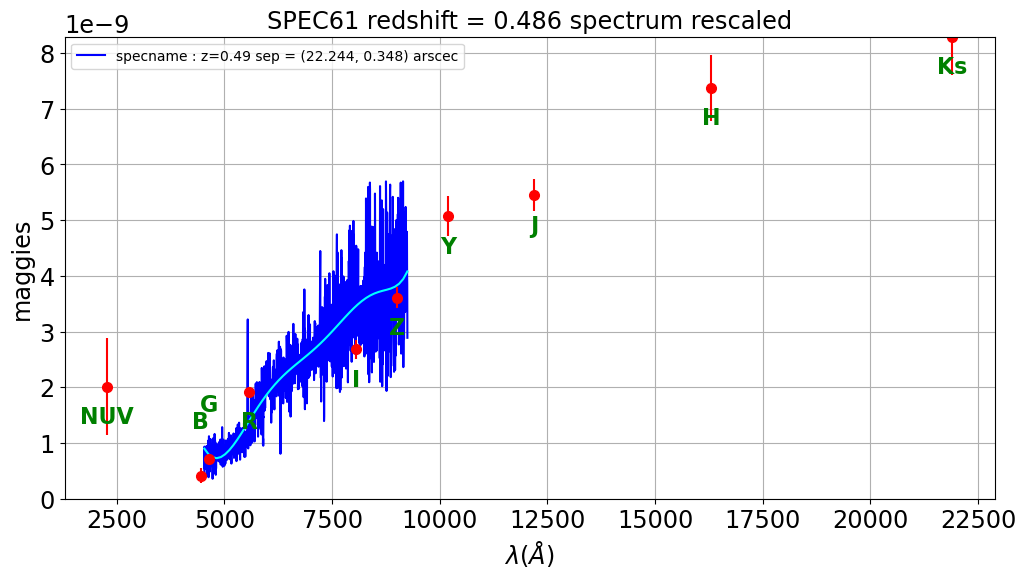

/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


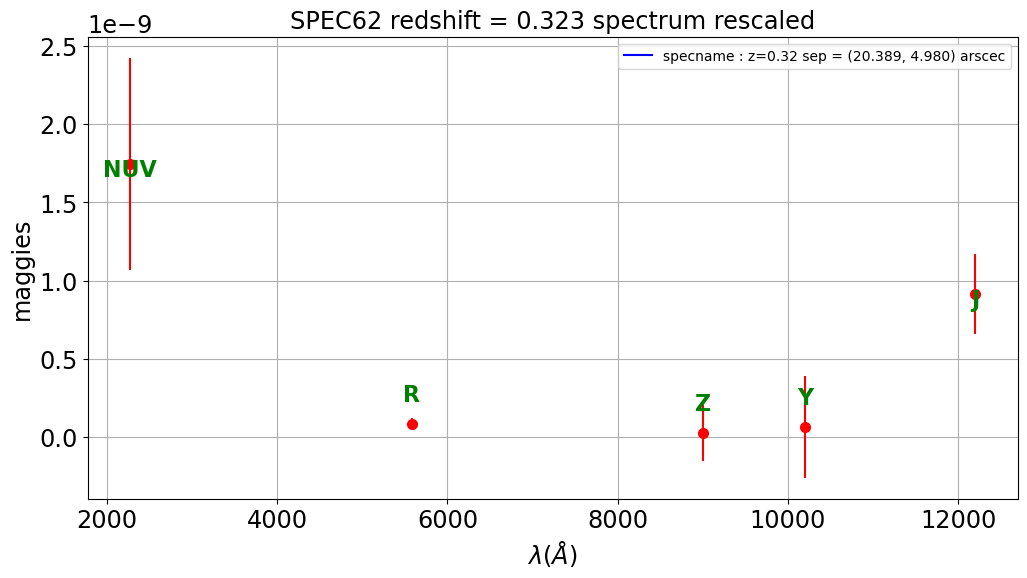

/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


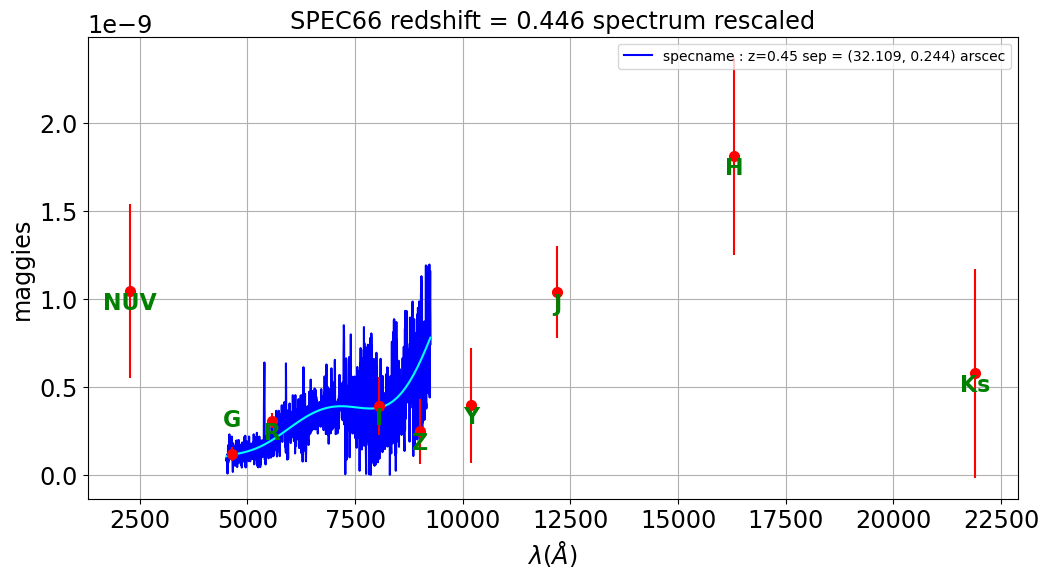

/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


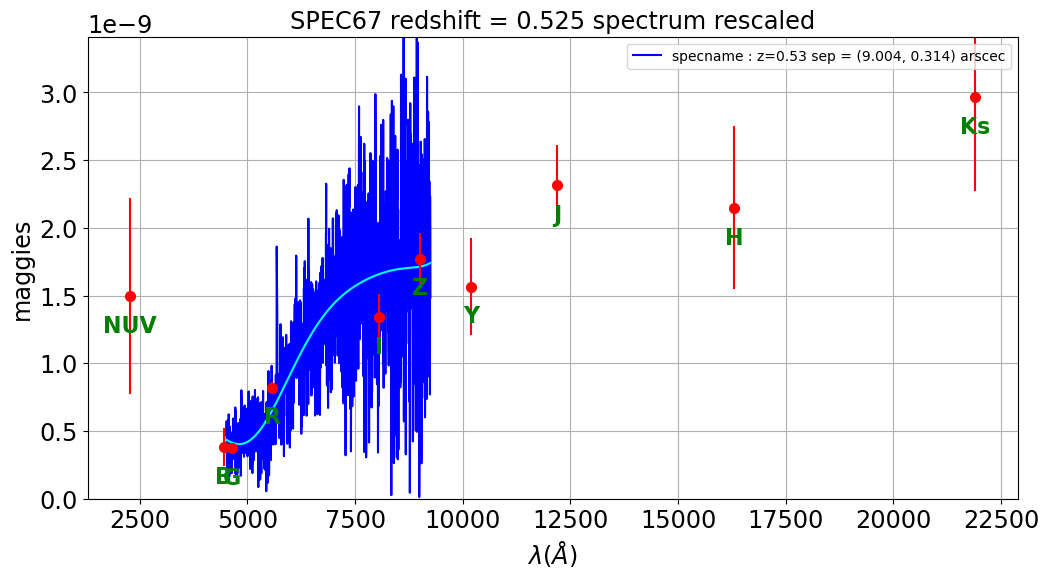

/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


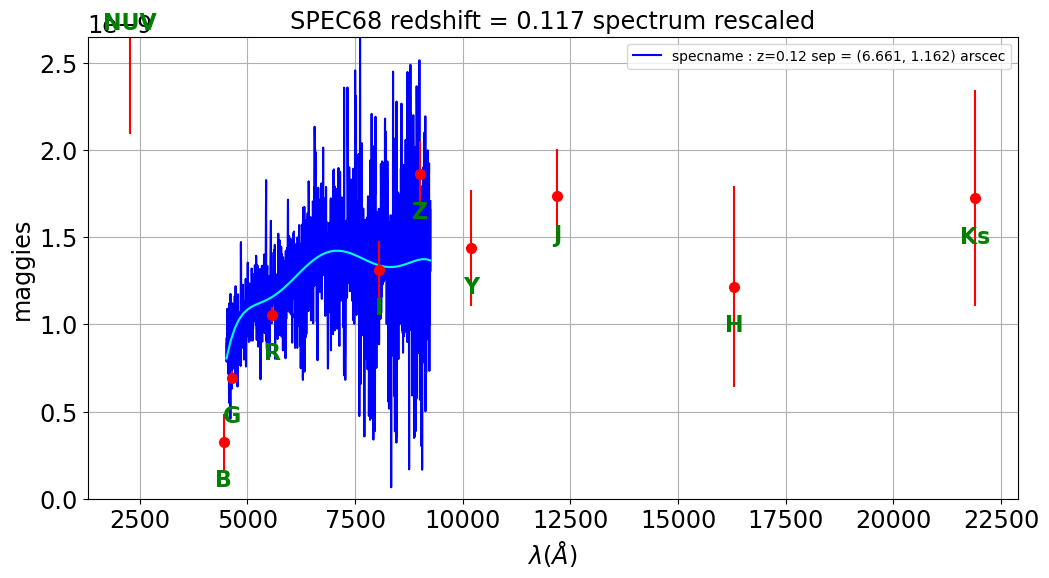

/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


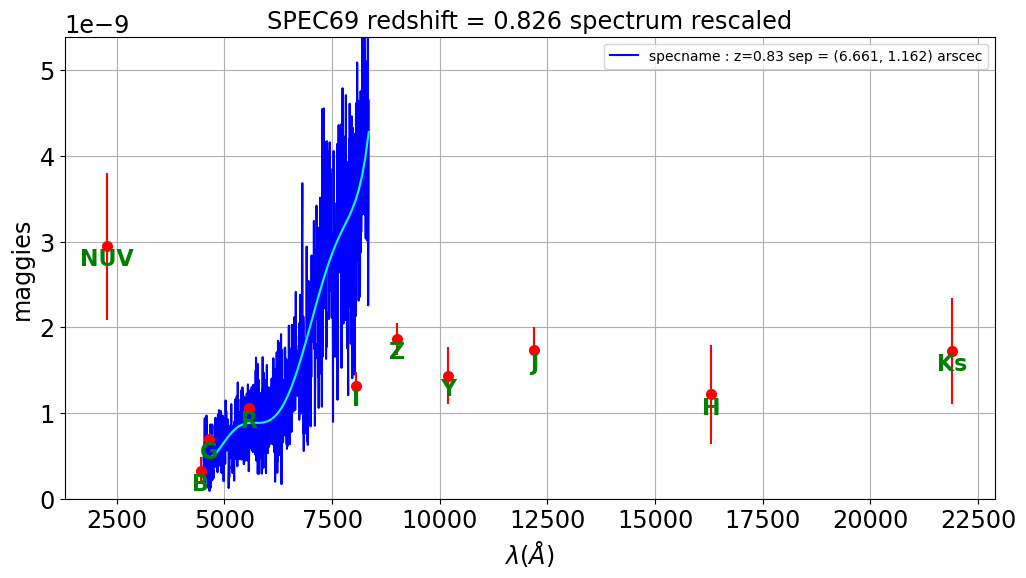

/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


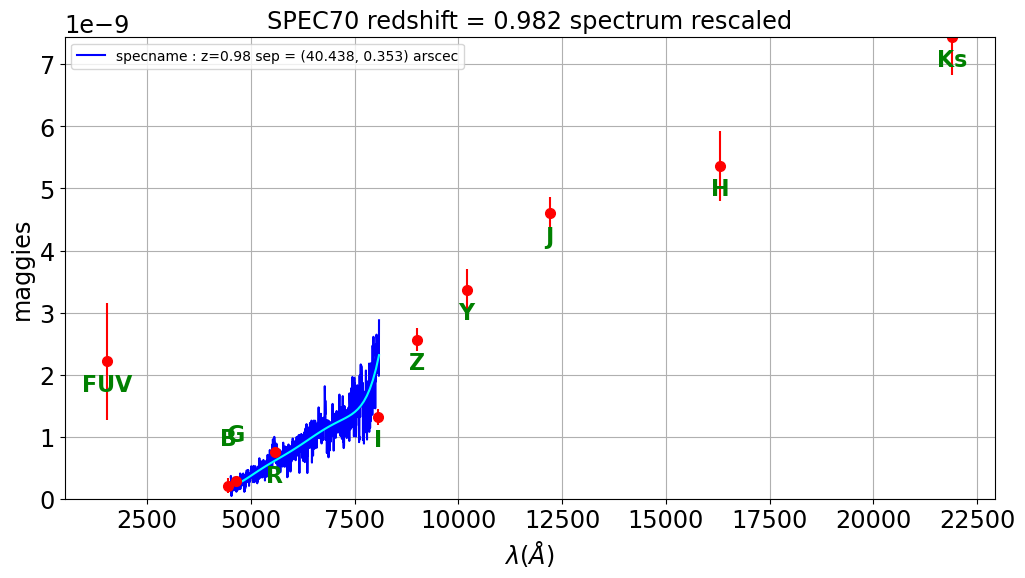

/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


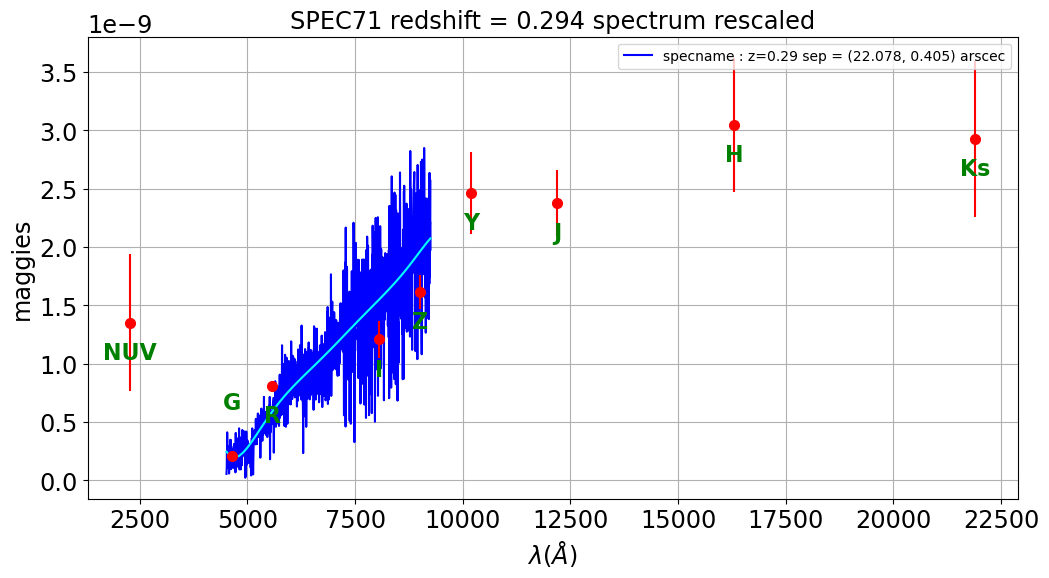

/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


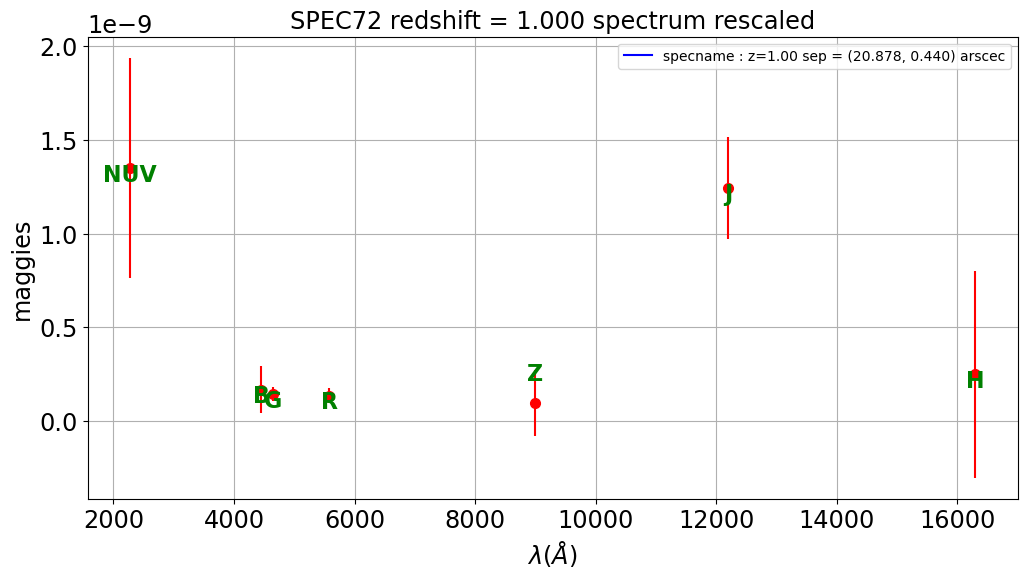

/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


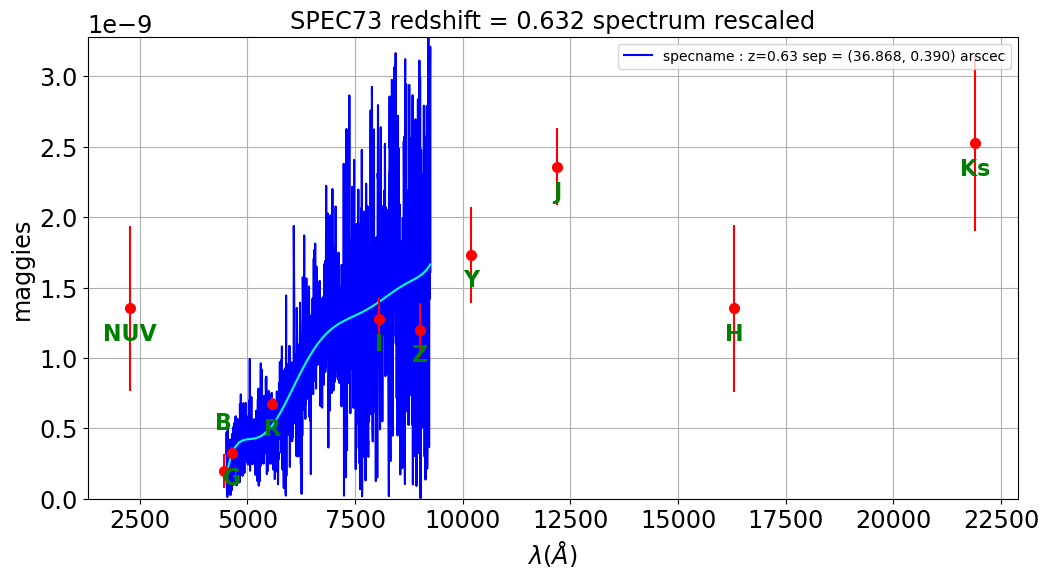

/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


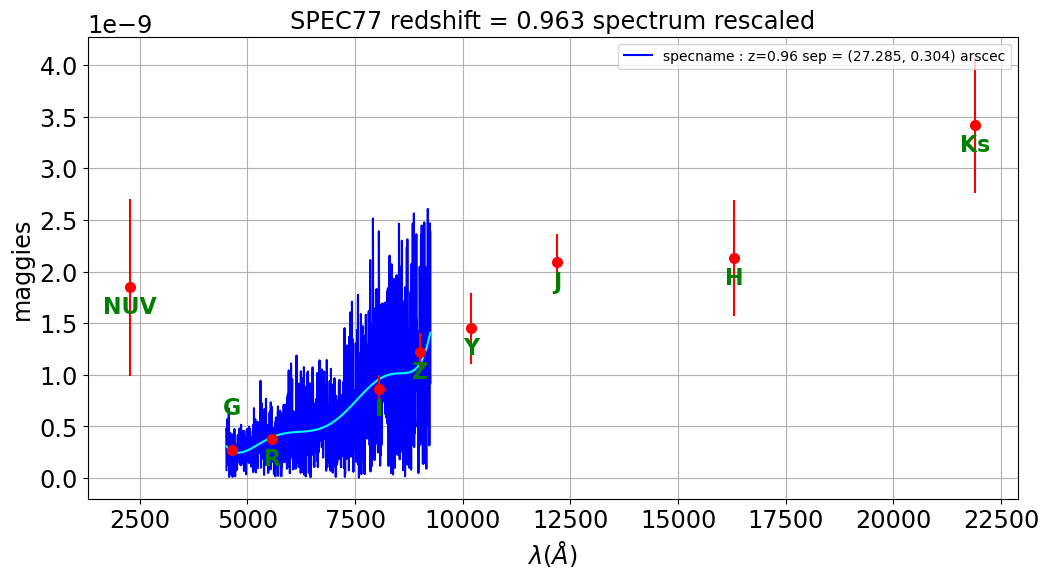

/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


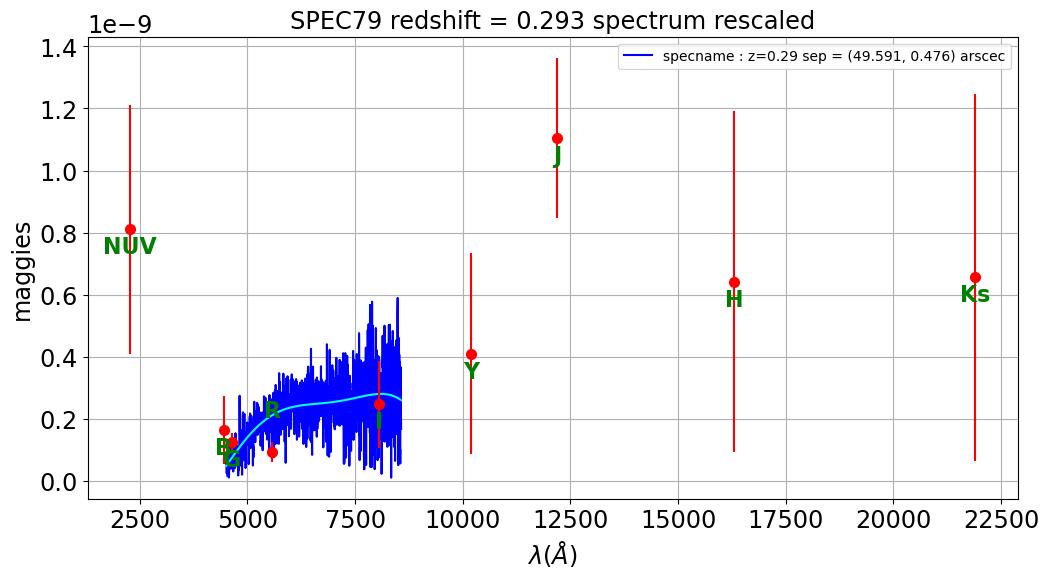

/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


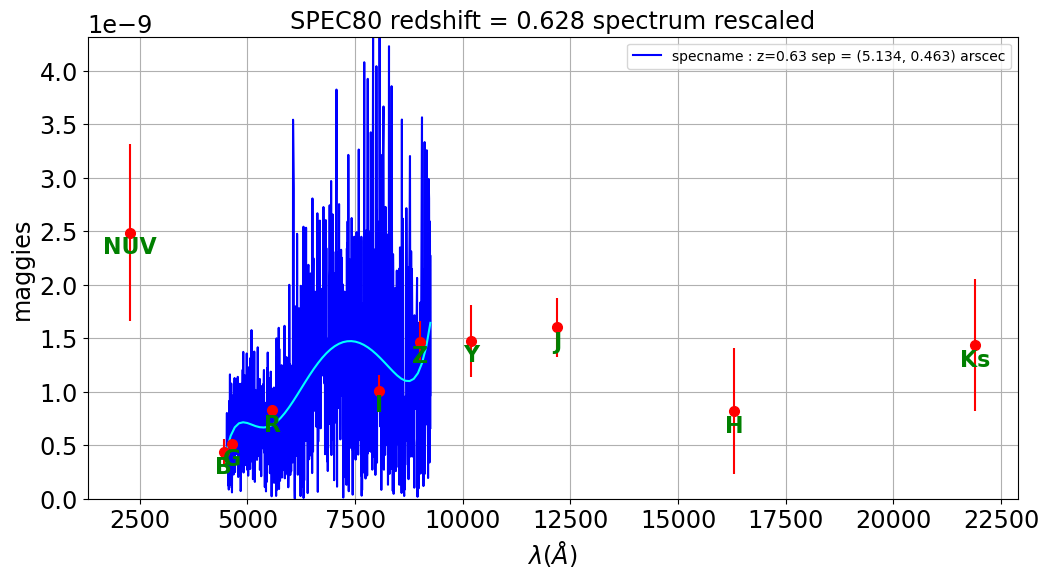

/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


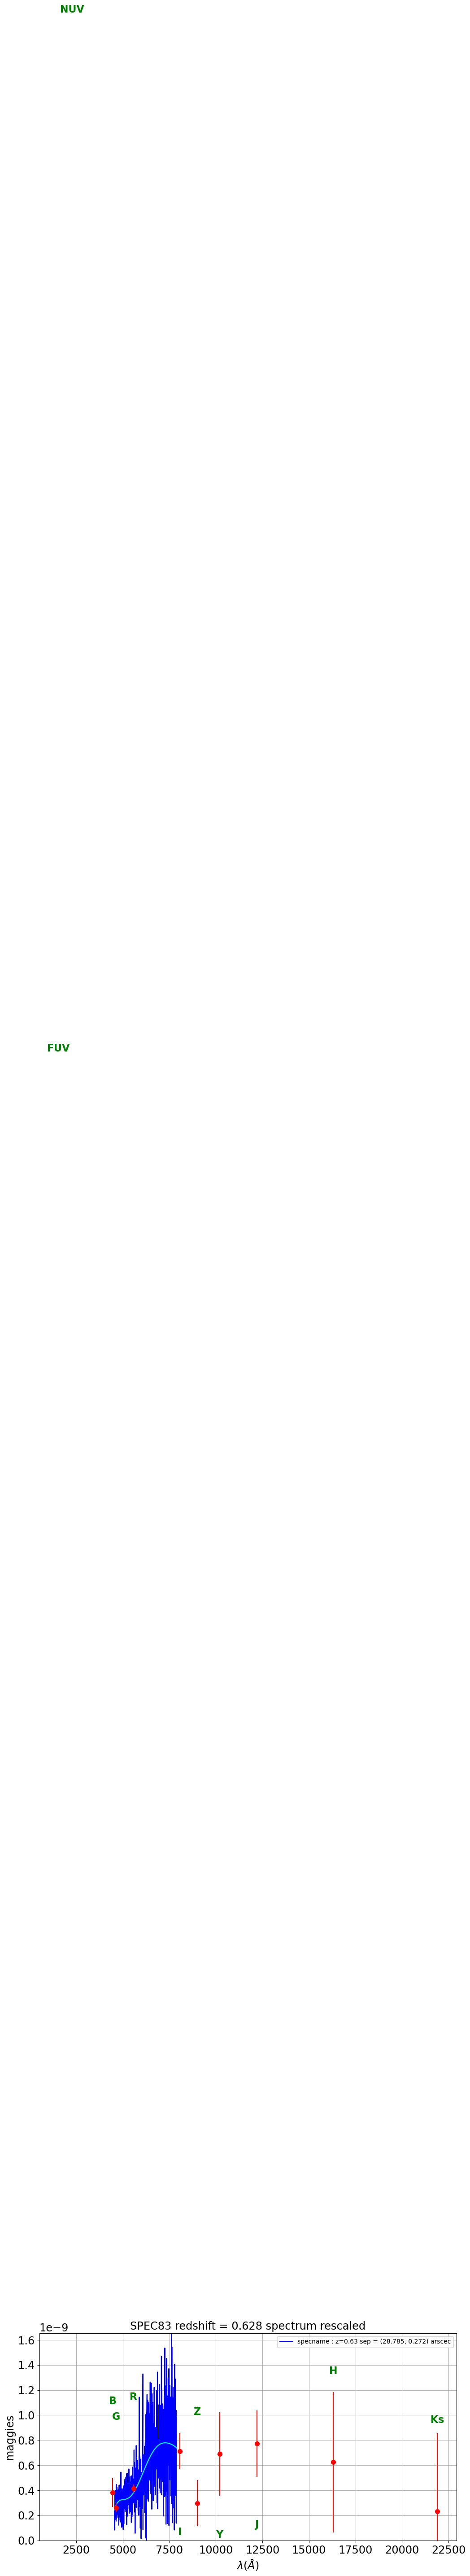

/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


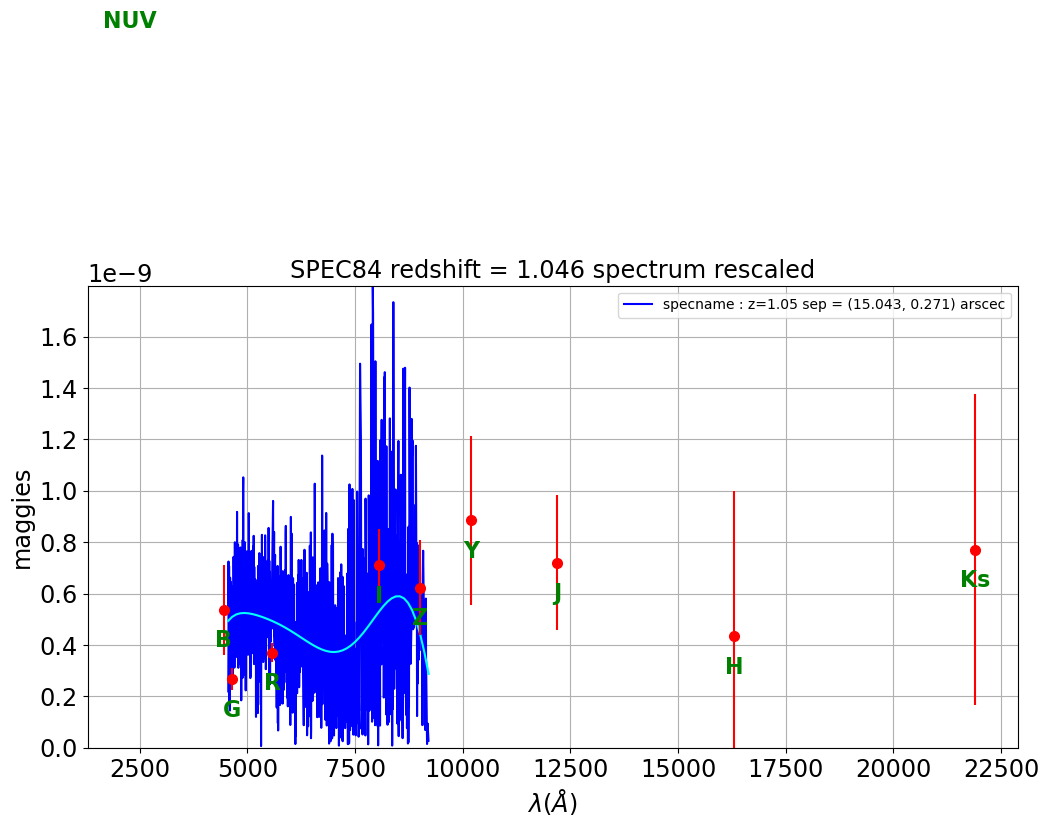

/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


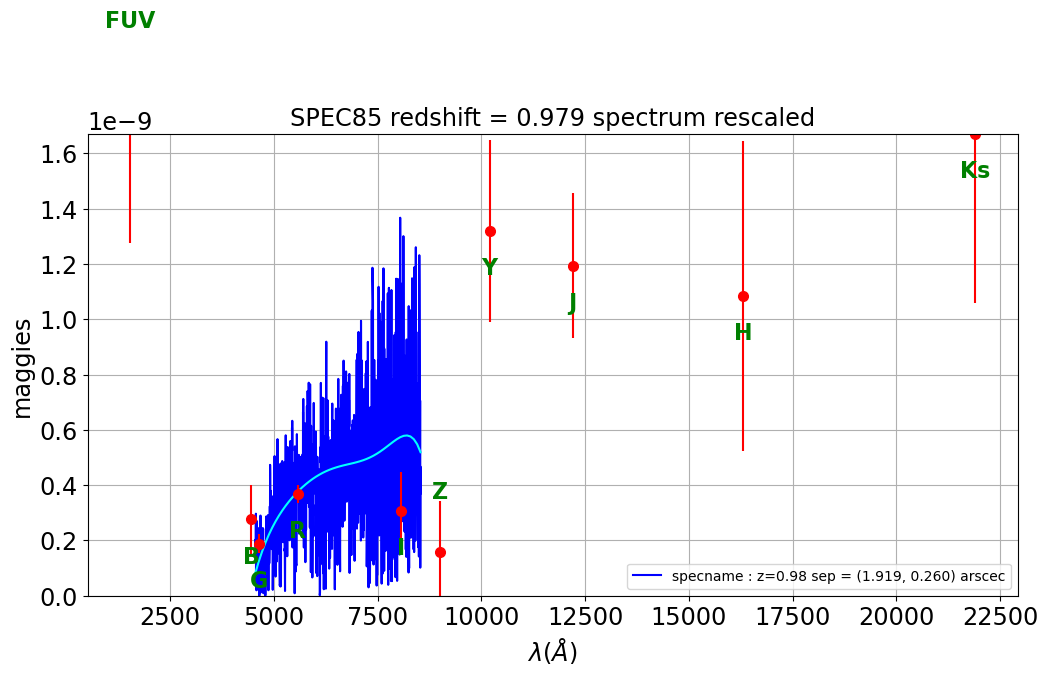

/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


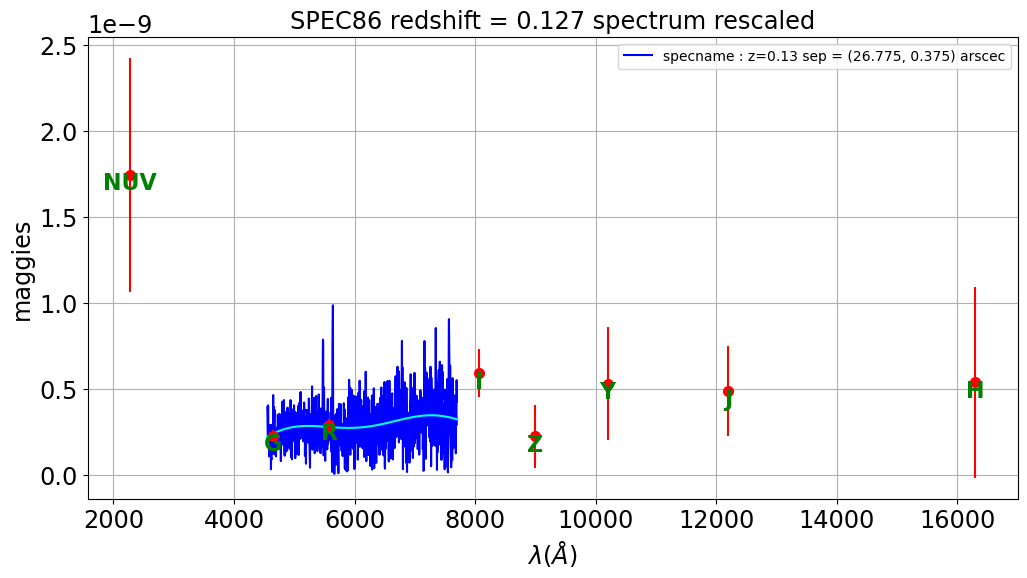

/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


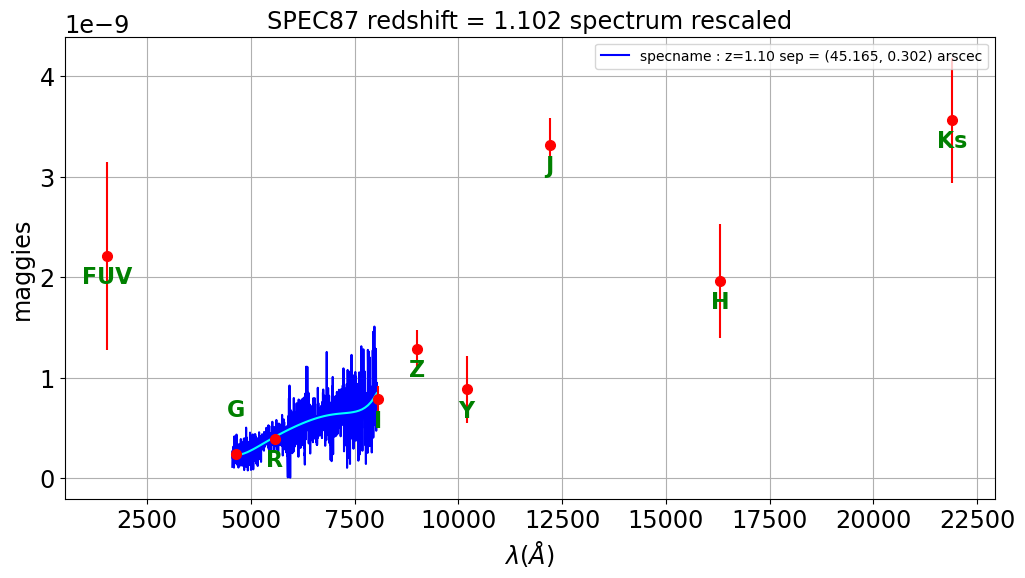

/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


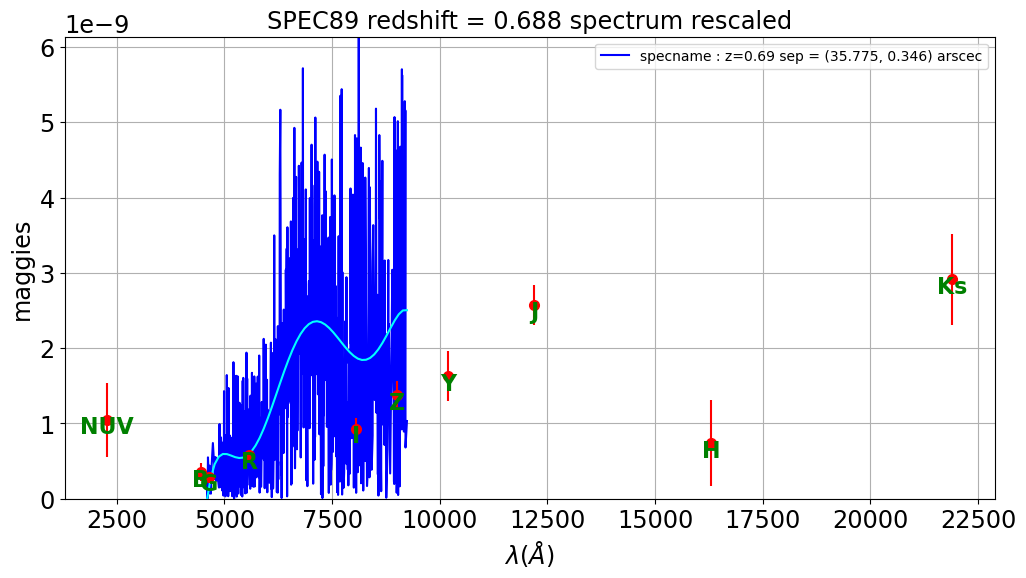

/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


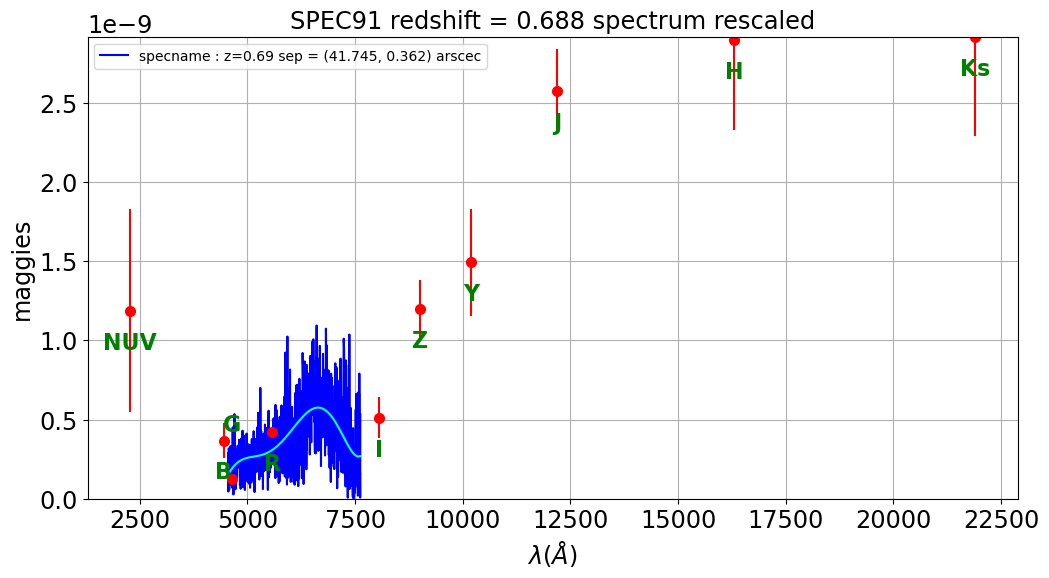

/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


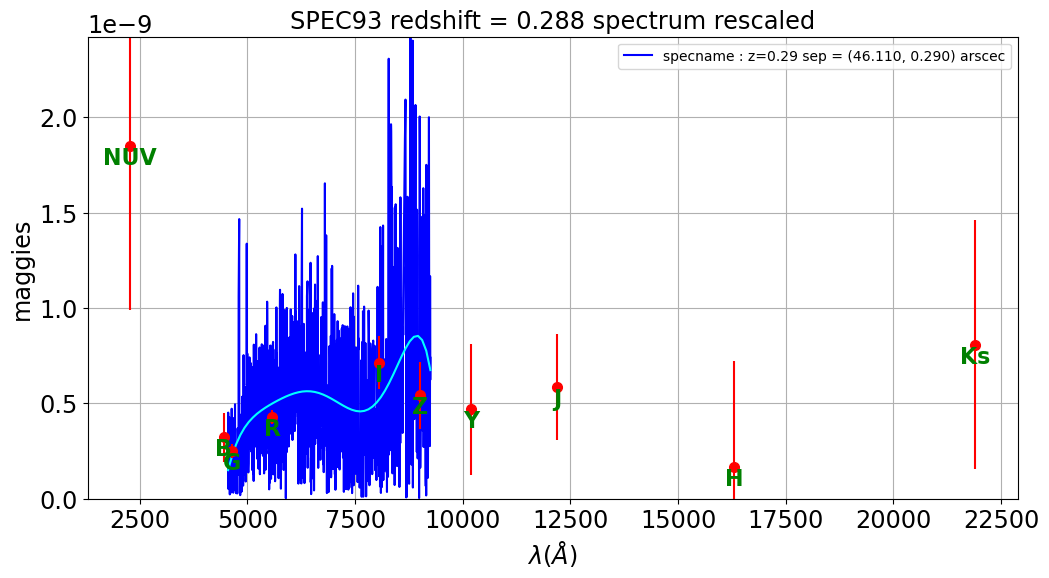

/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


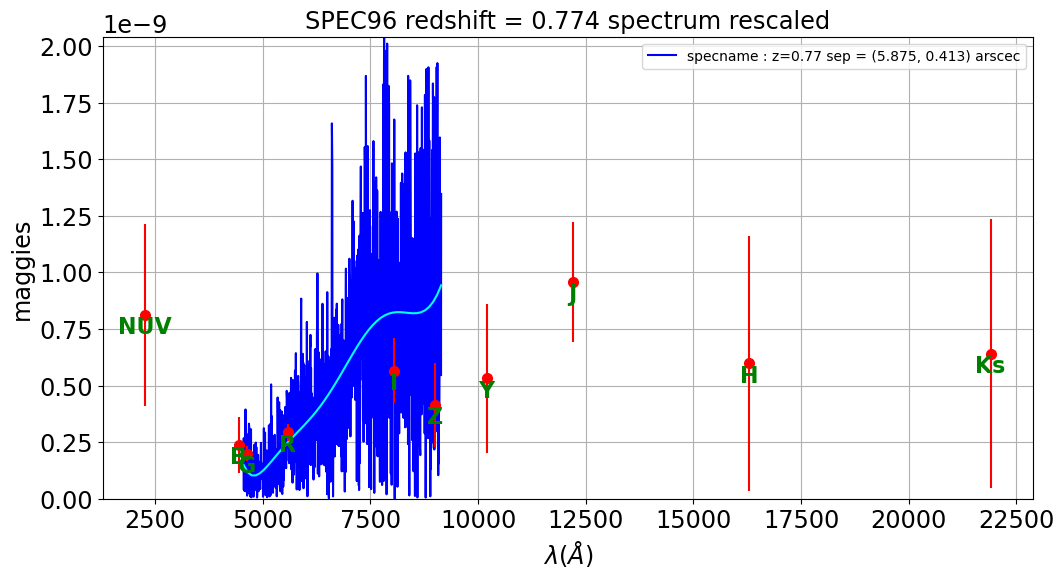

/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


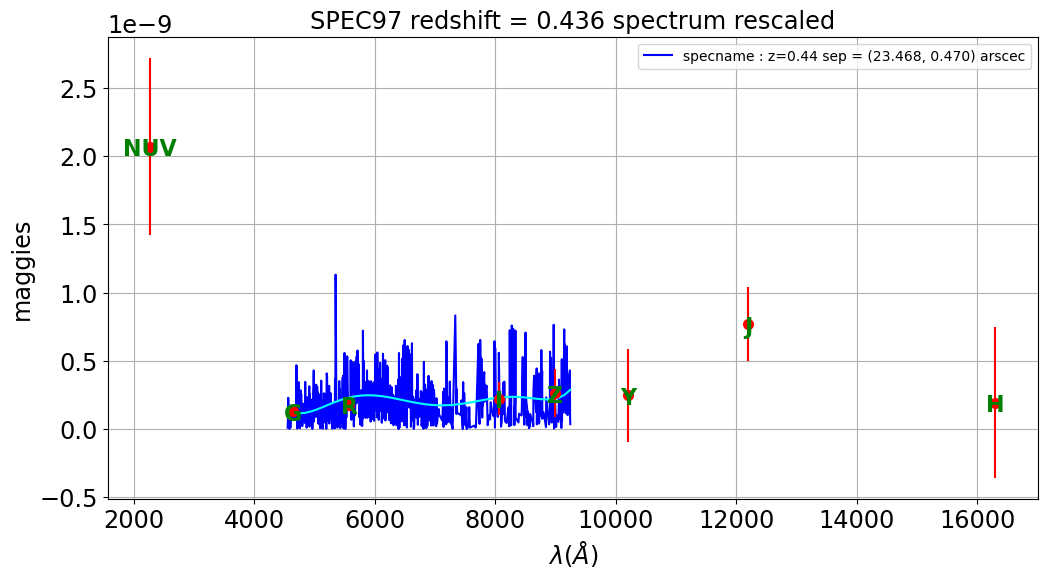

/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


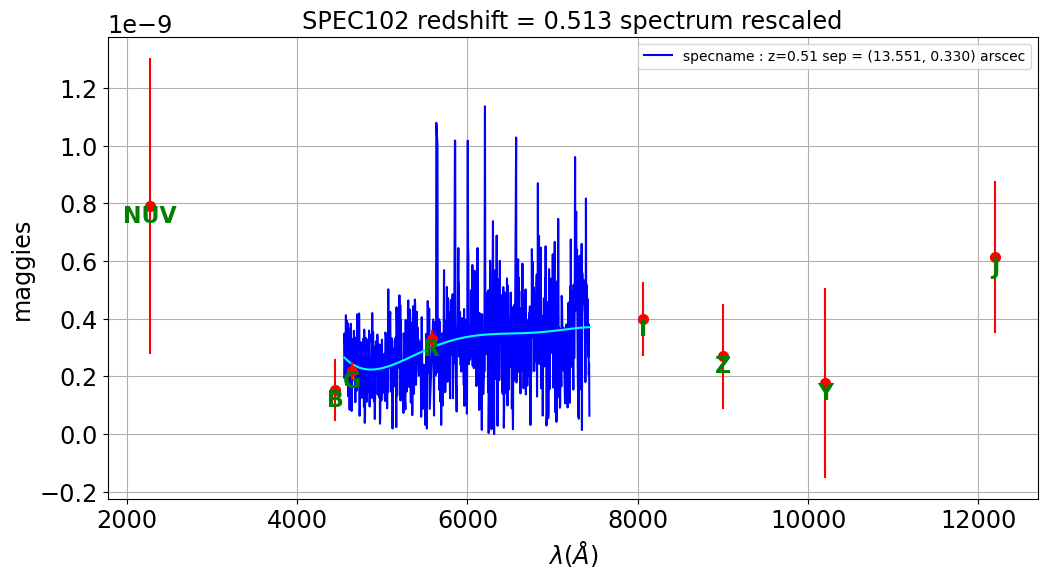

/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


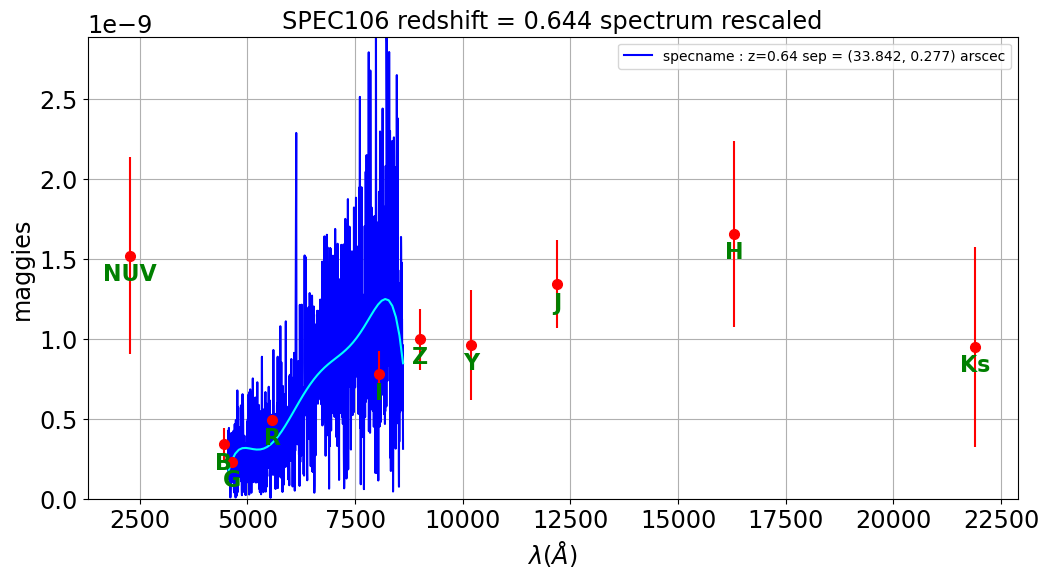

/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


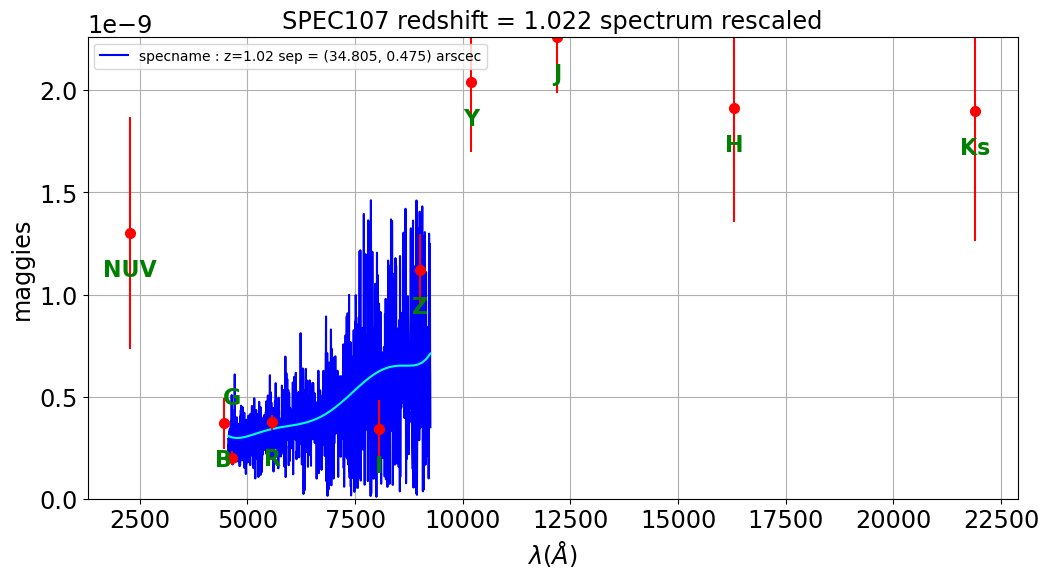

/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


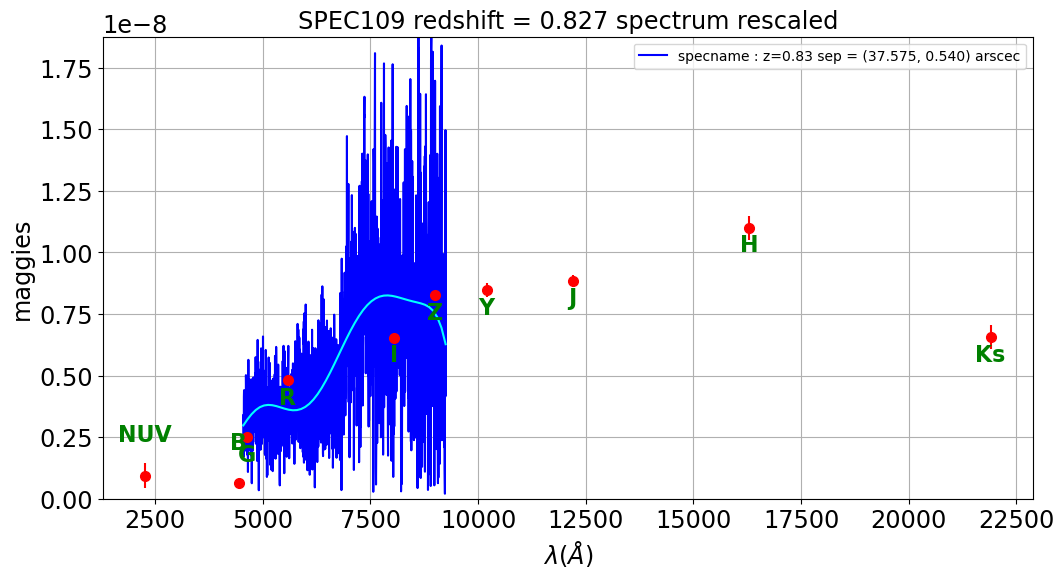

/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


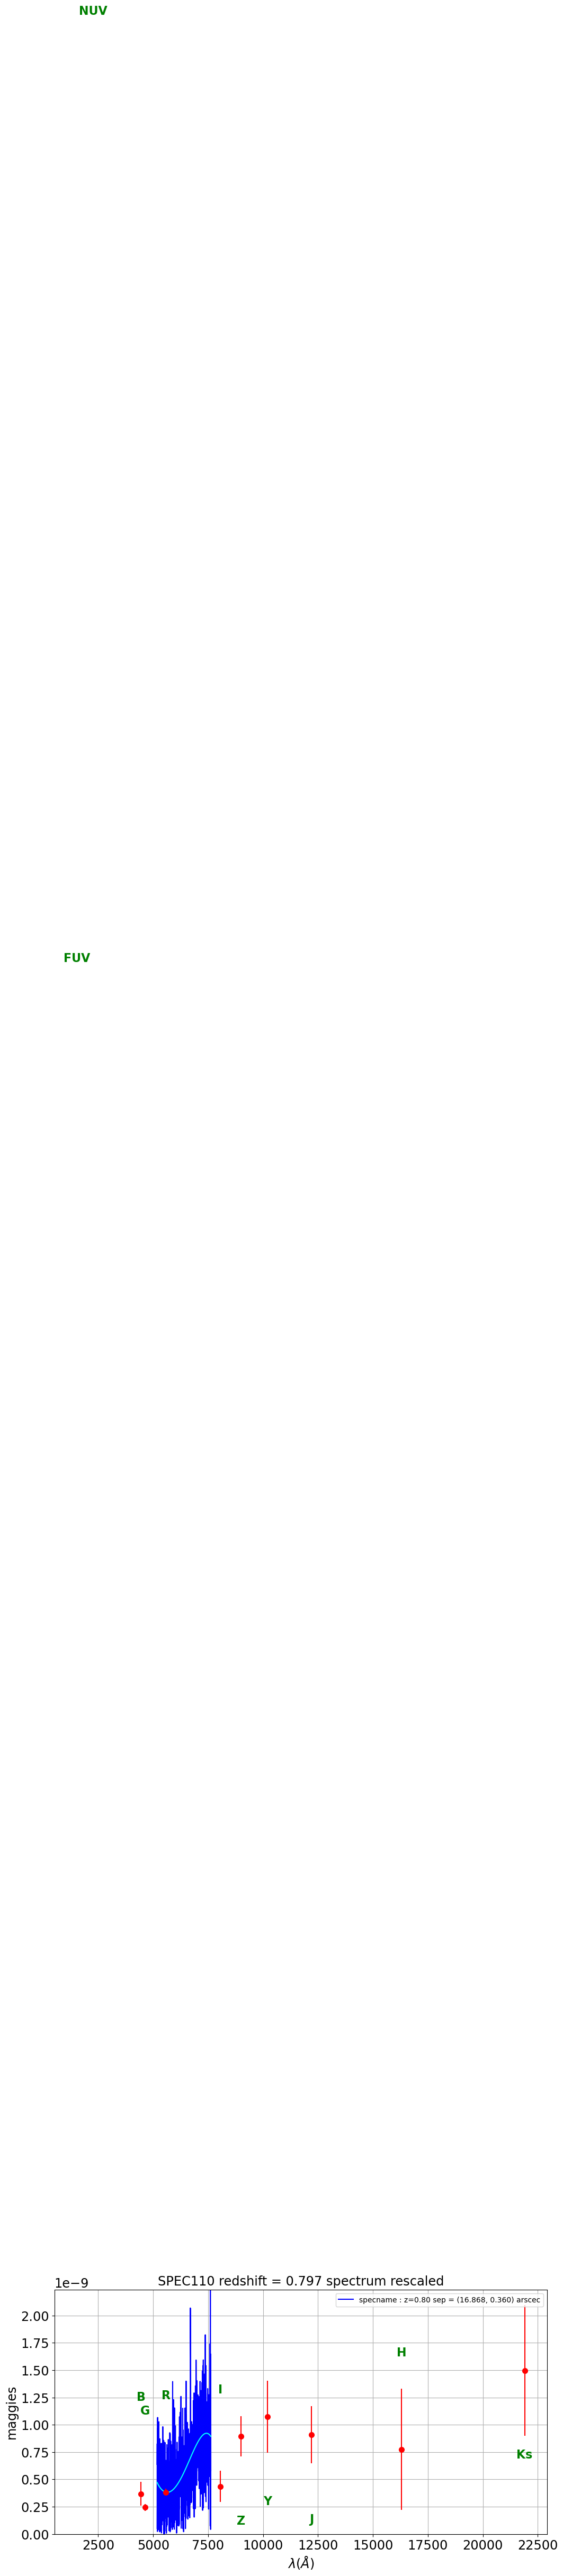

/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


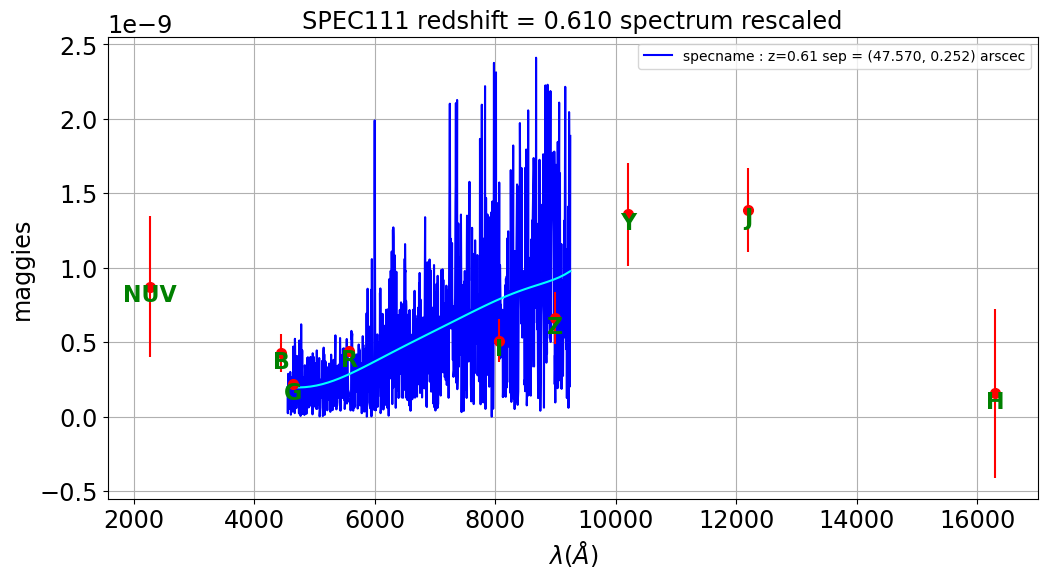

/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


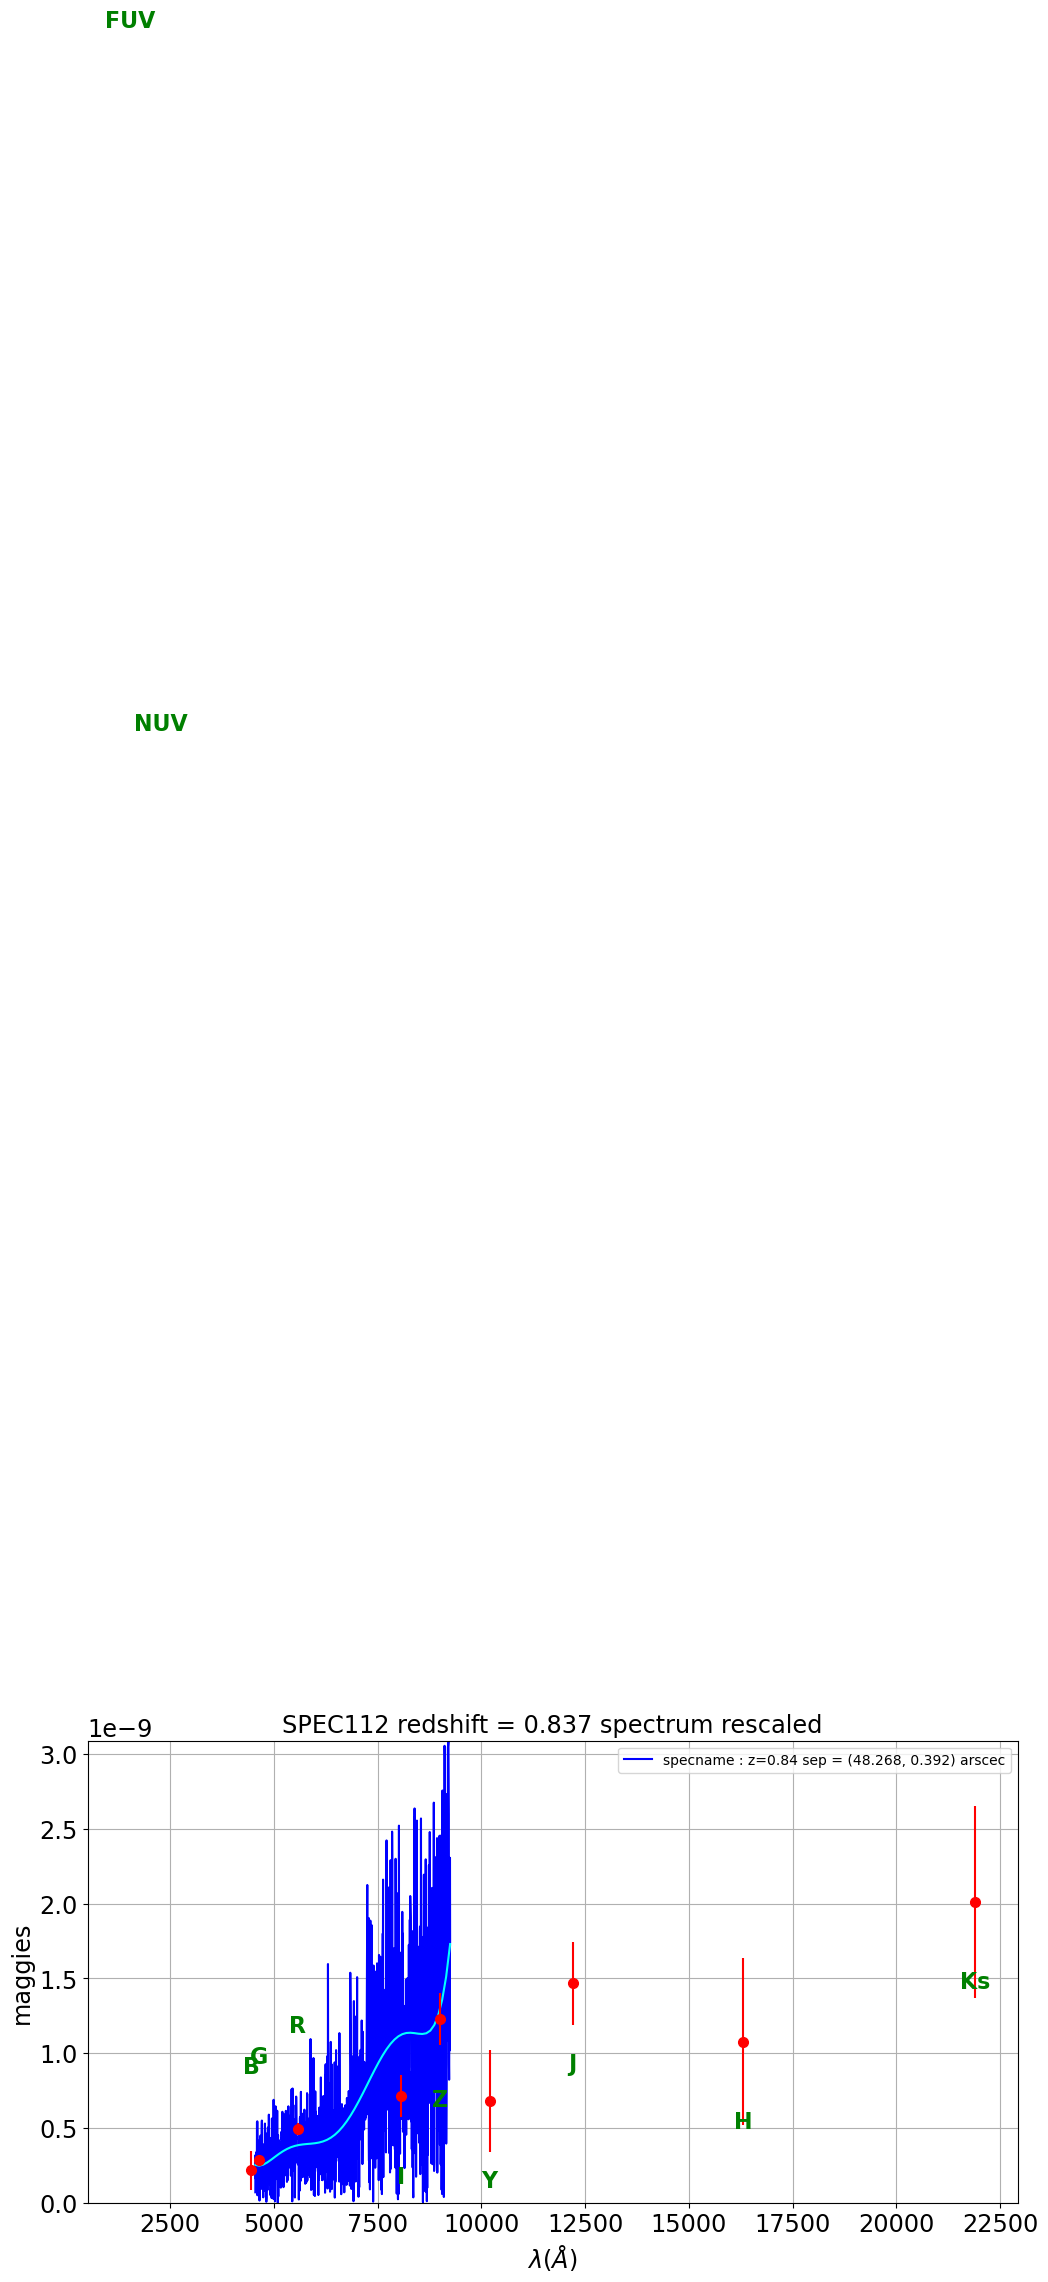

/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


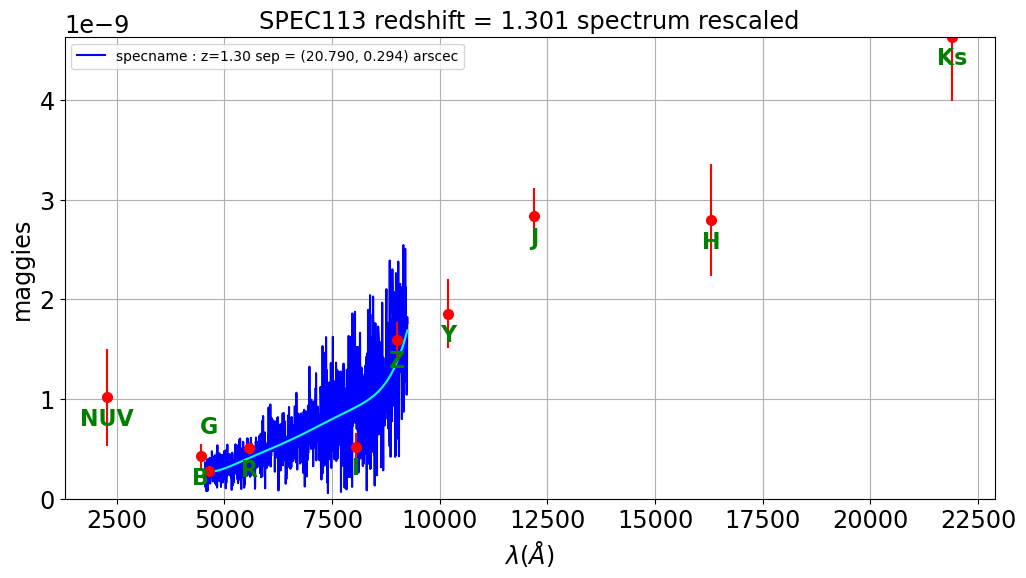

/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


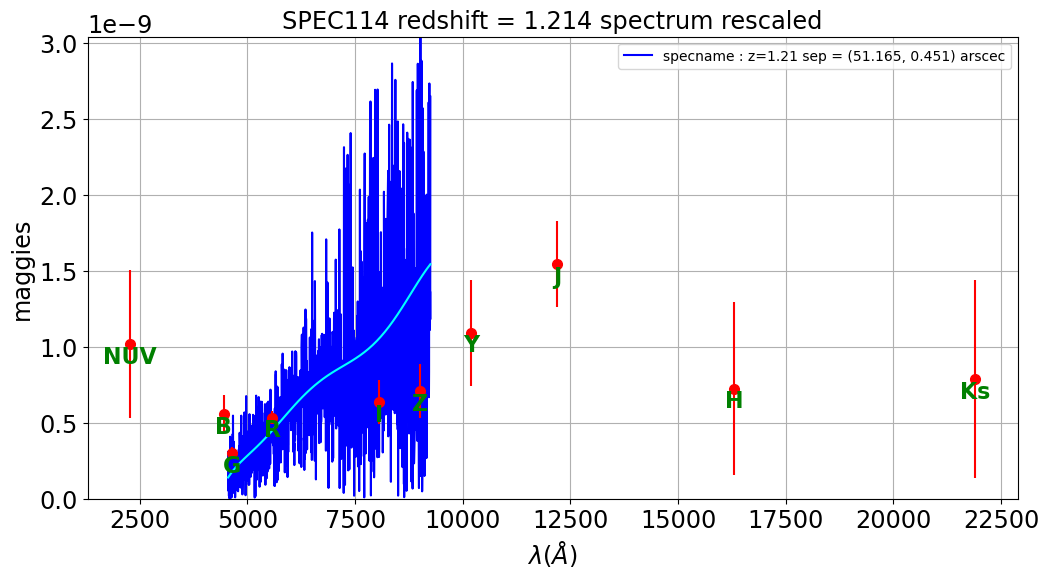

/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


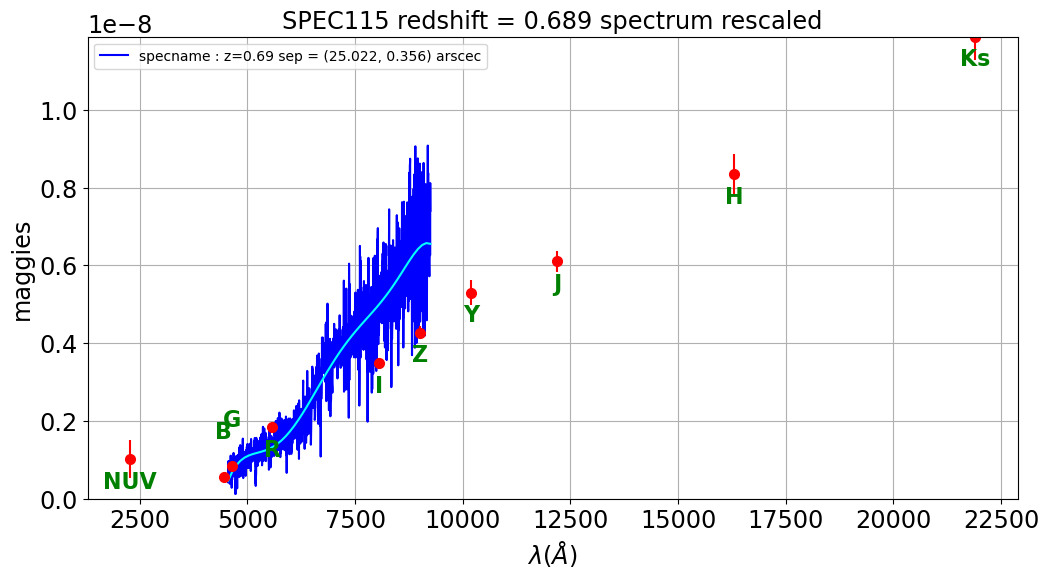

/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


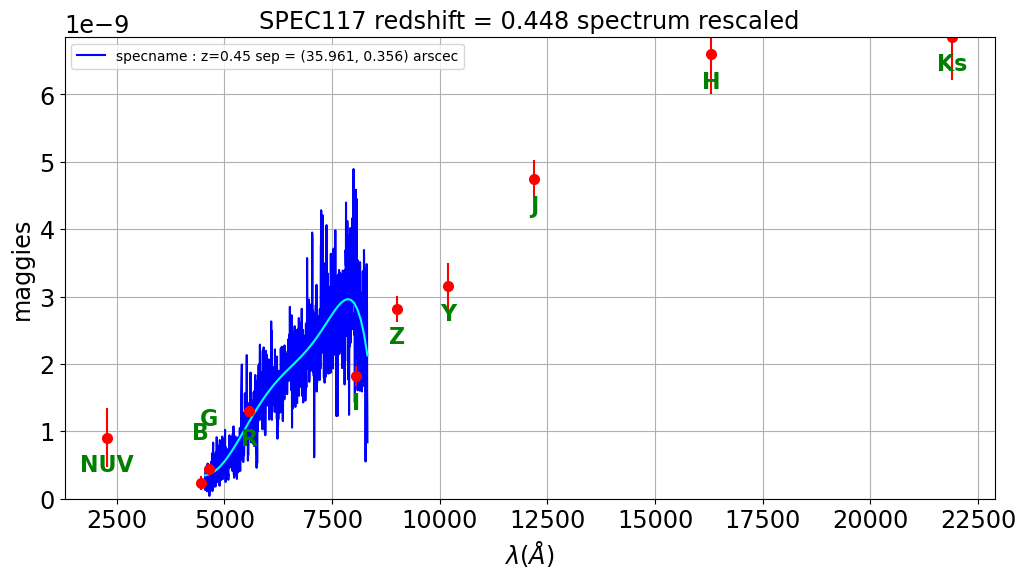

/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


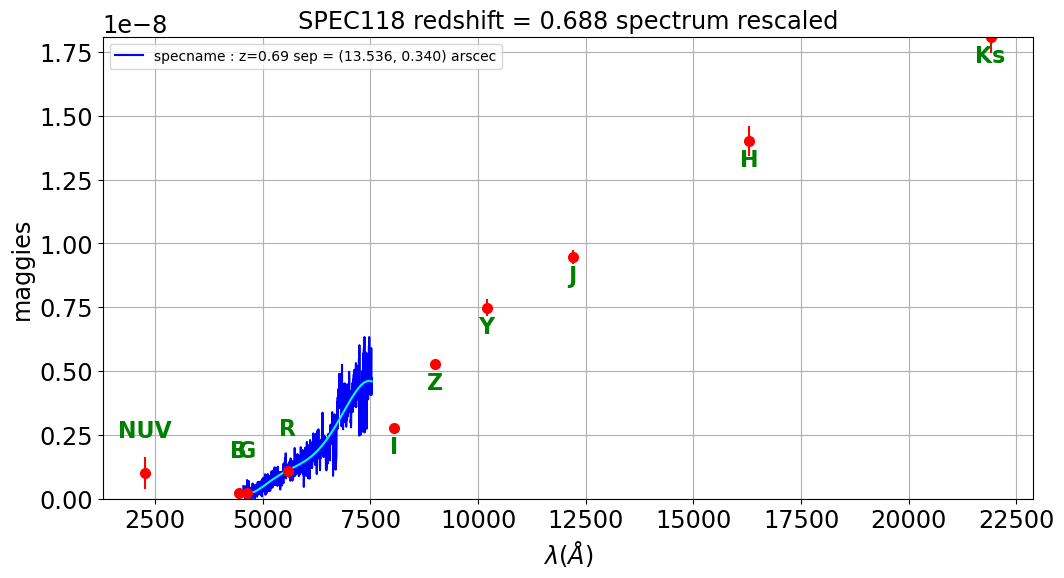

/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


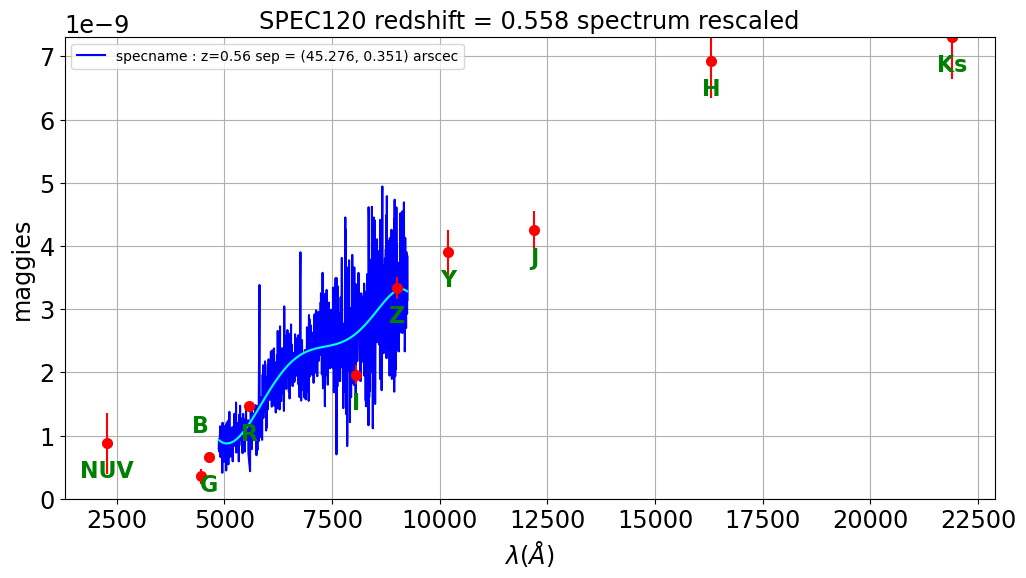

/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


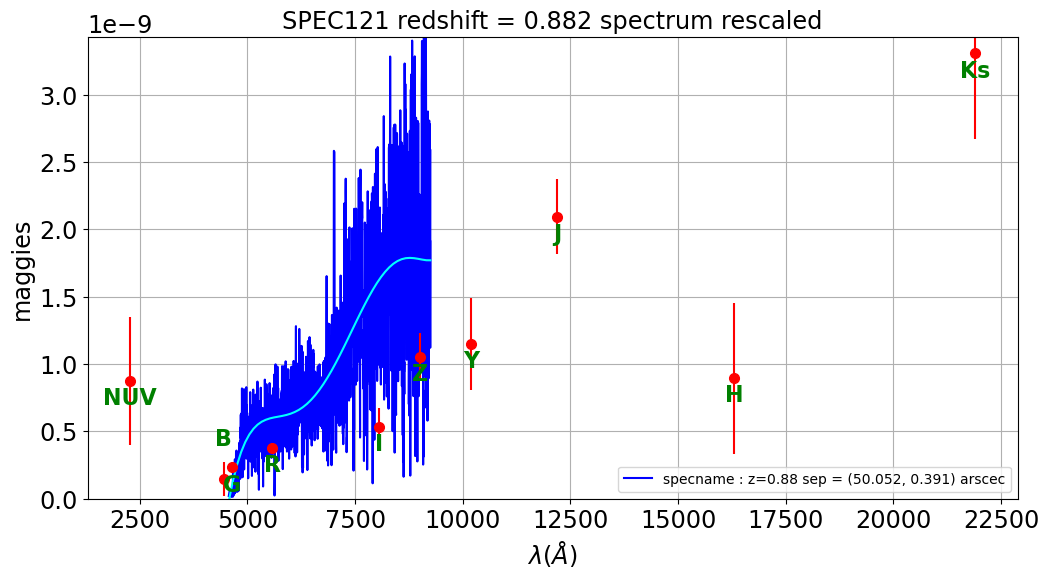

/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


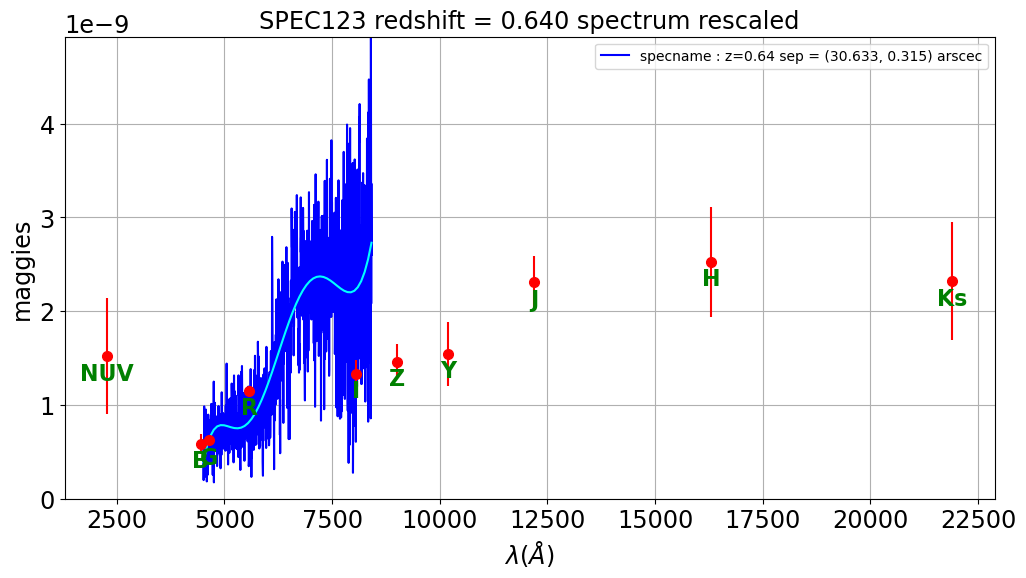

/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


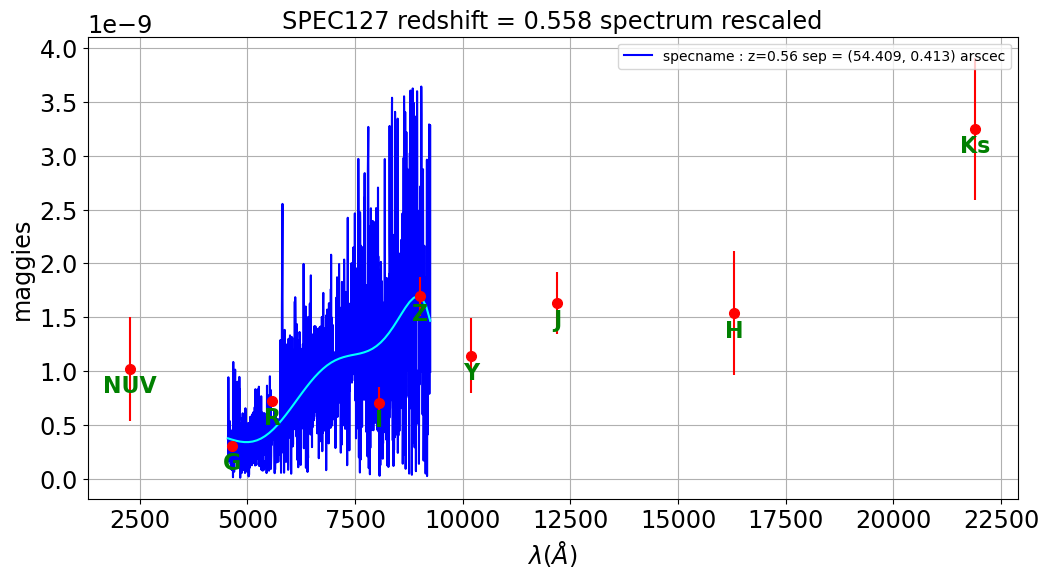

/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


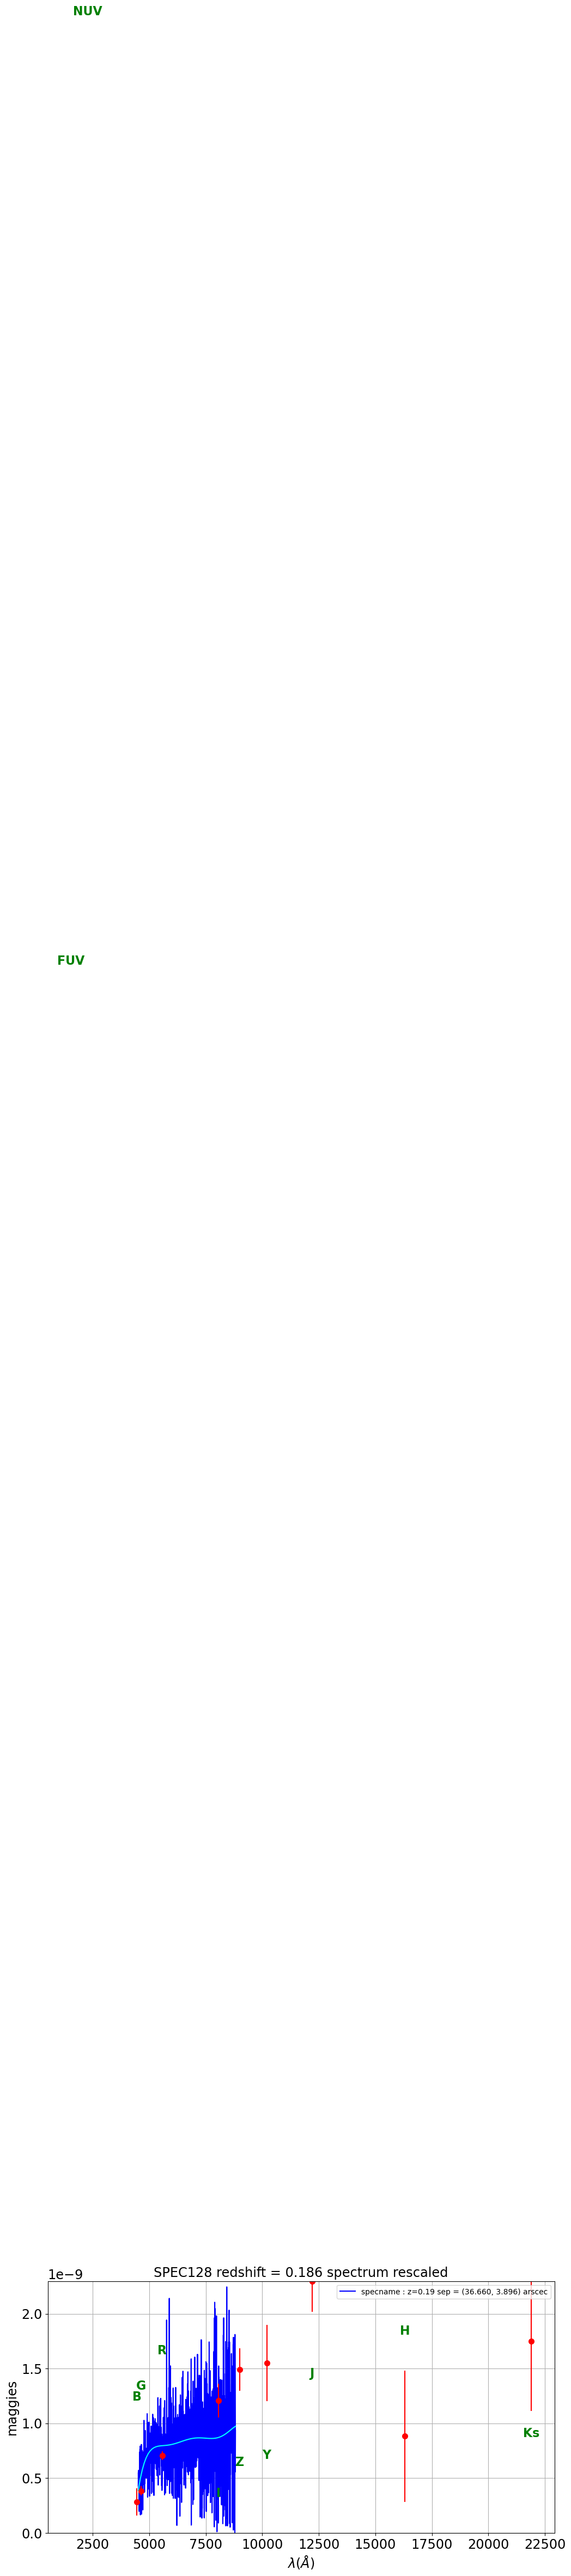

/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


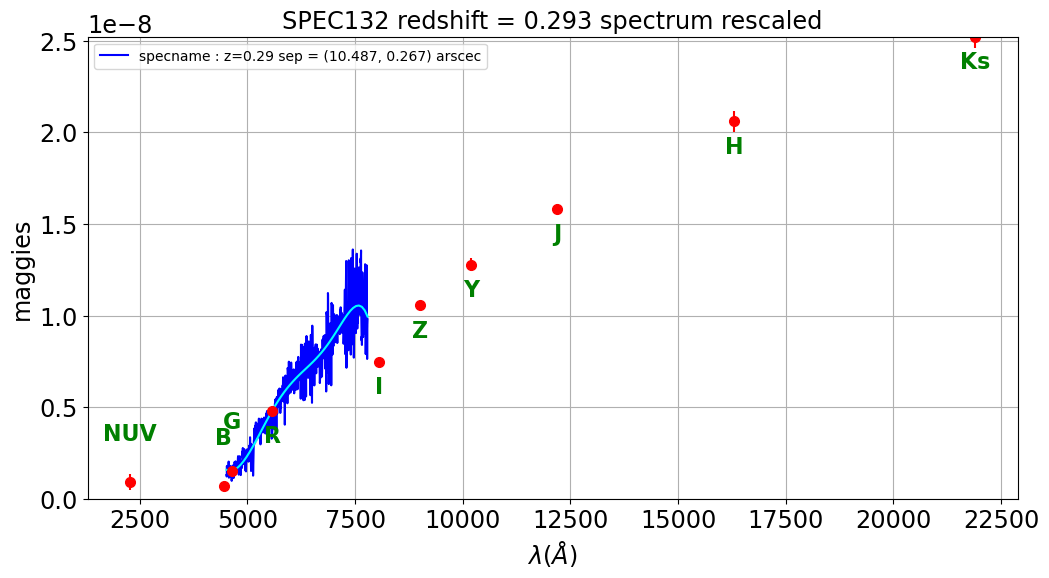

/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


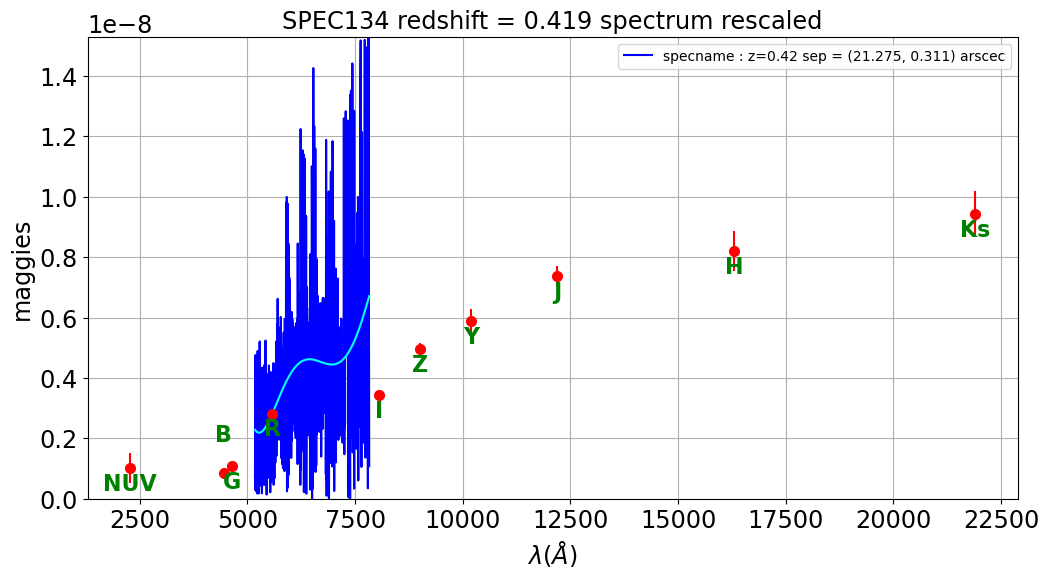

/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


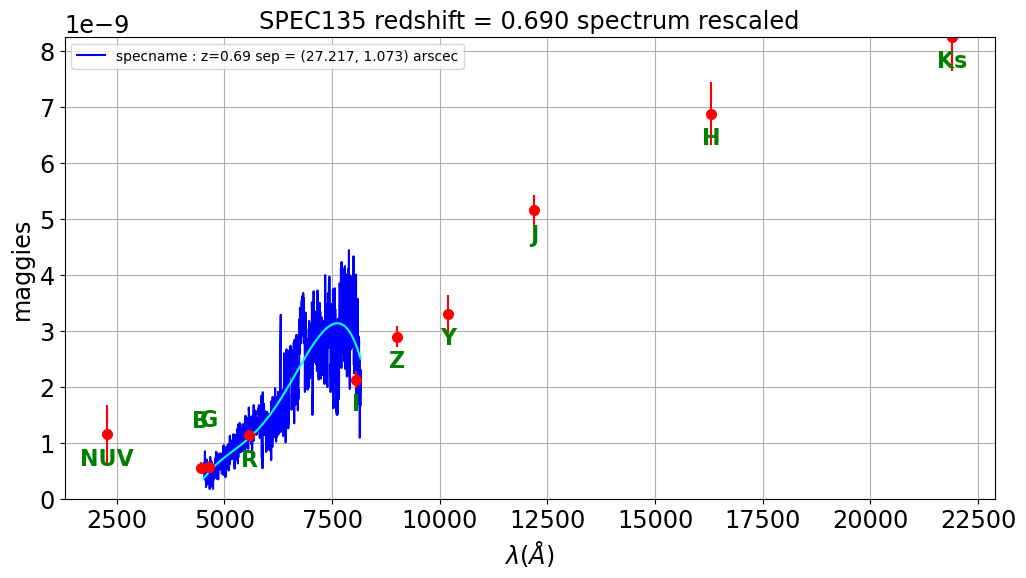

/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


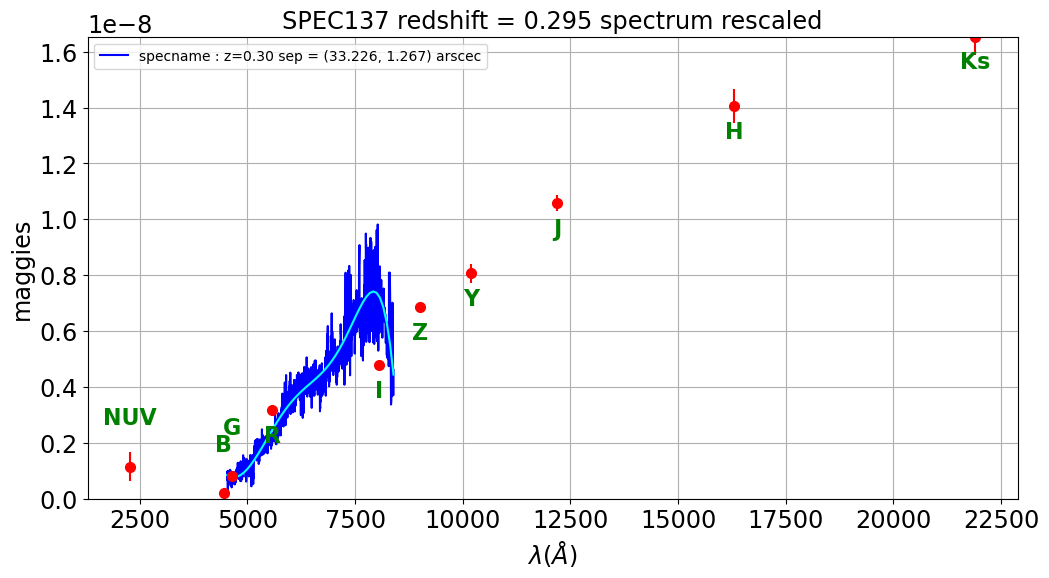

/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


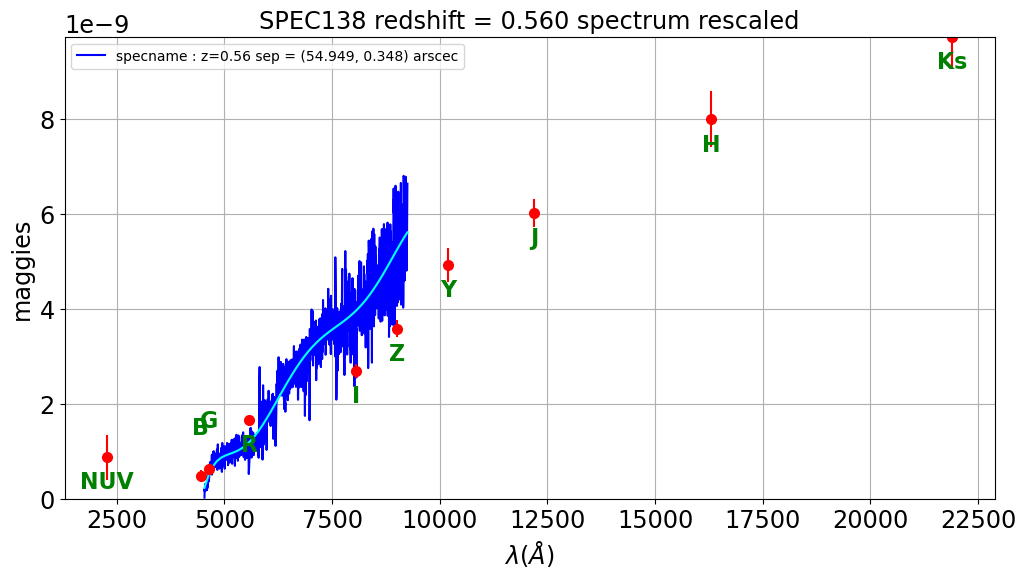

/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


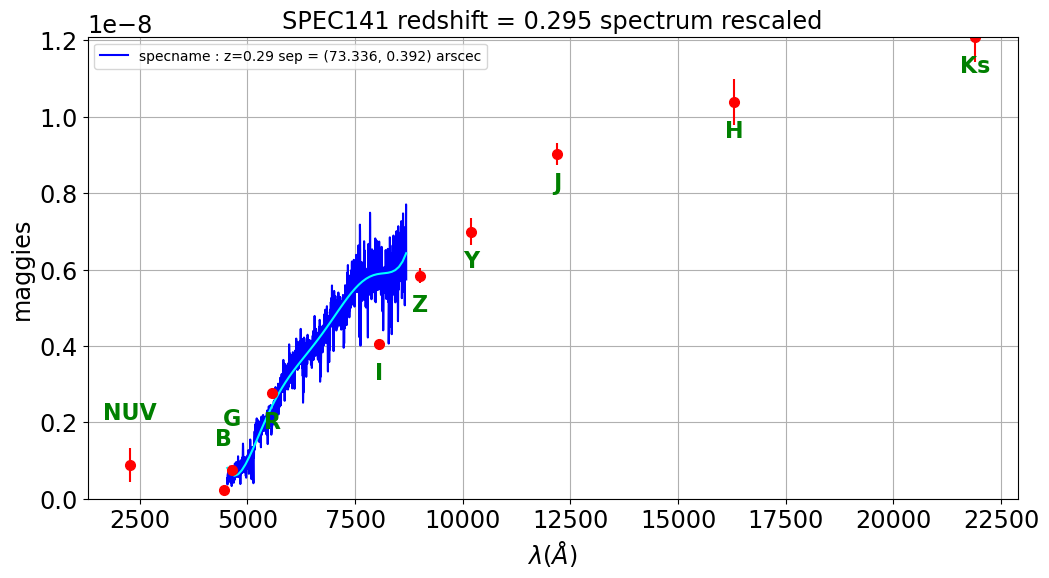

/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


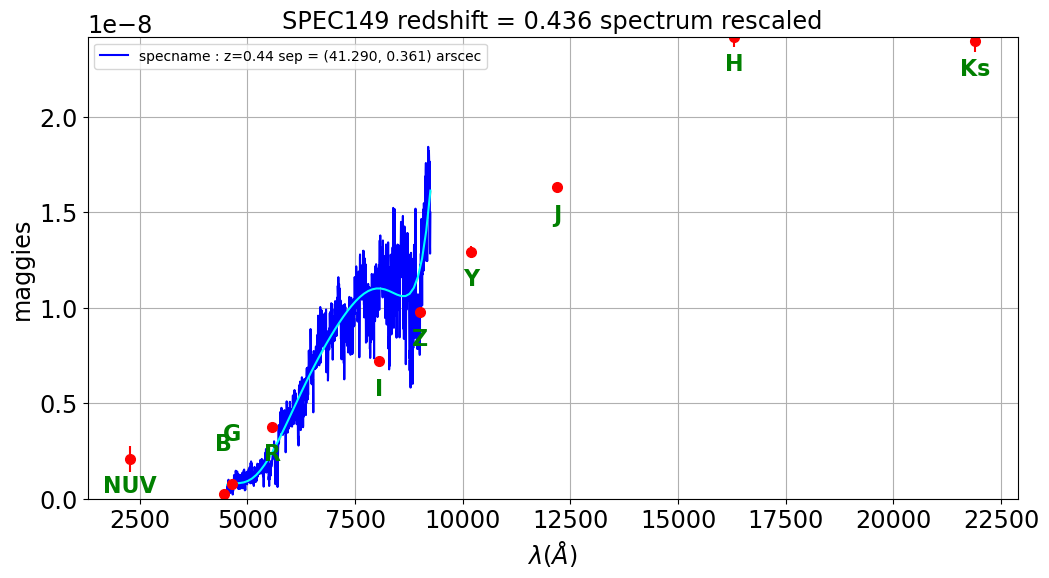

/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


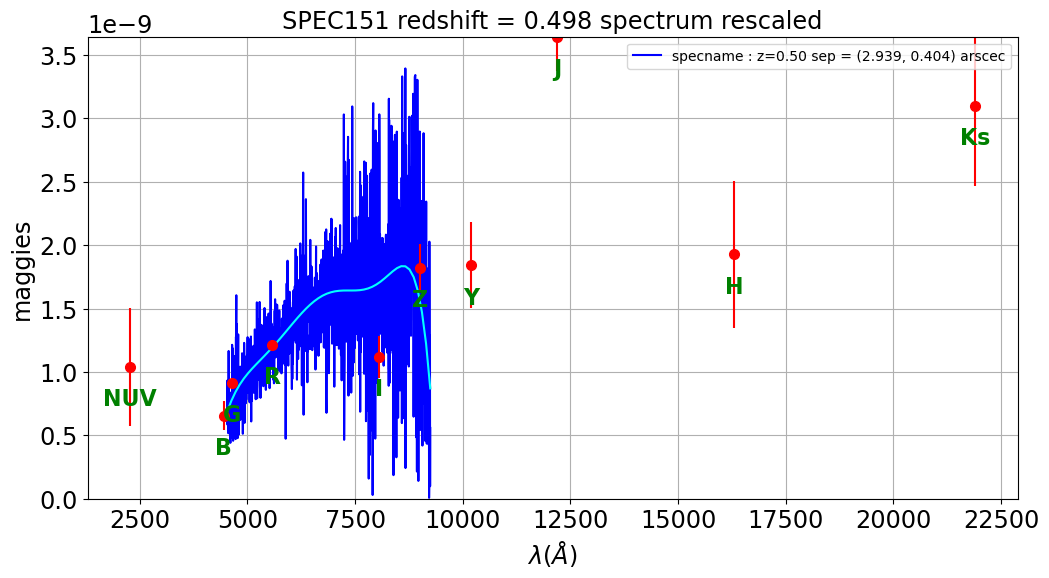

/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


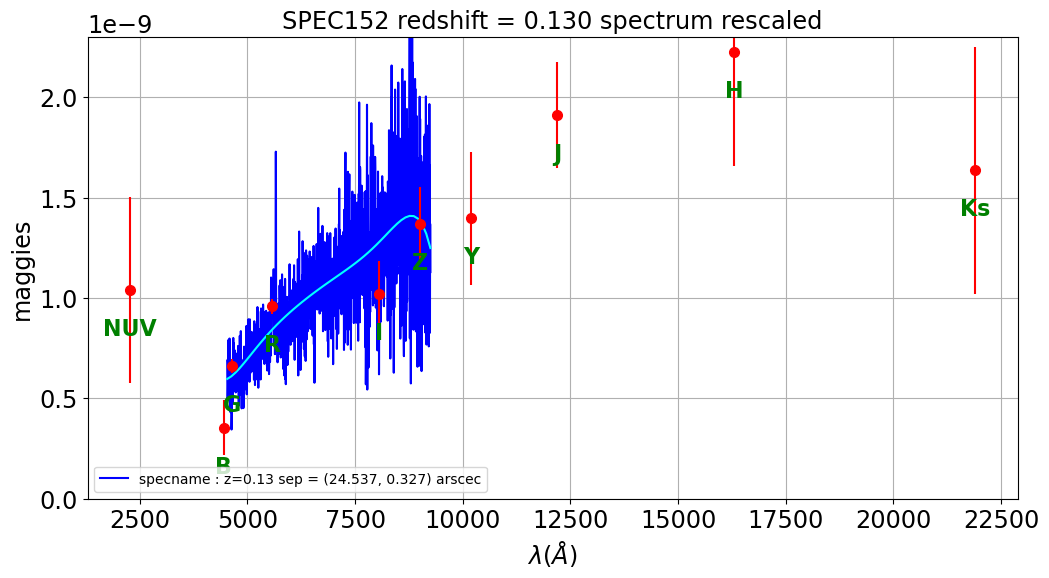

/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


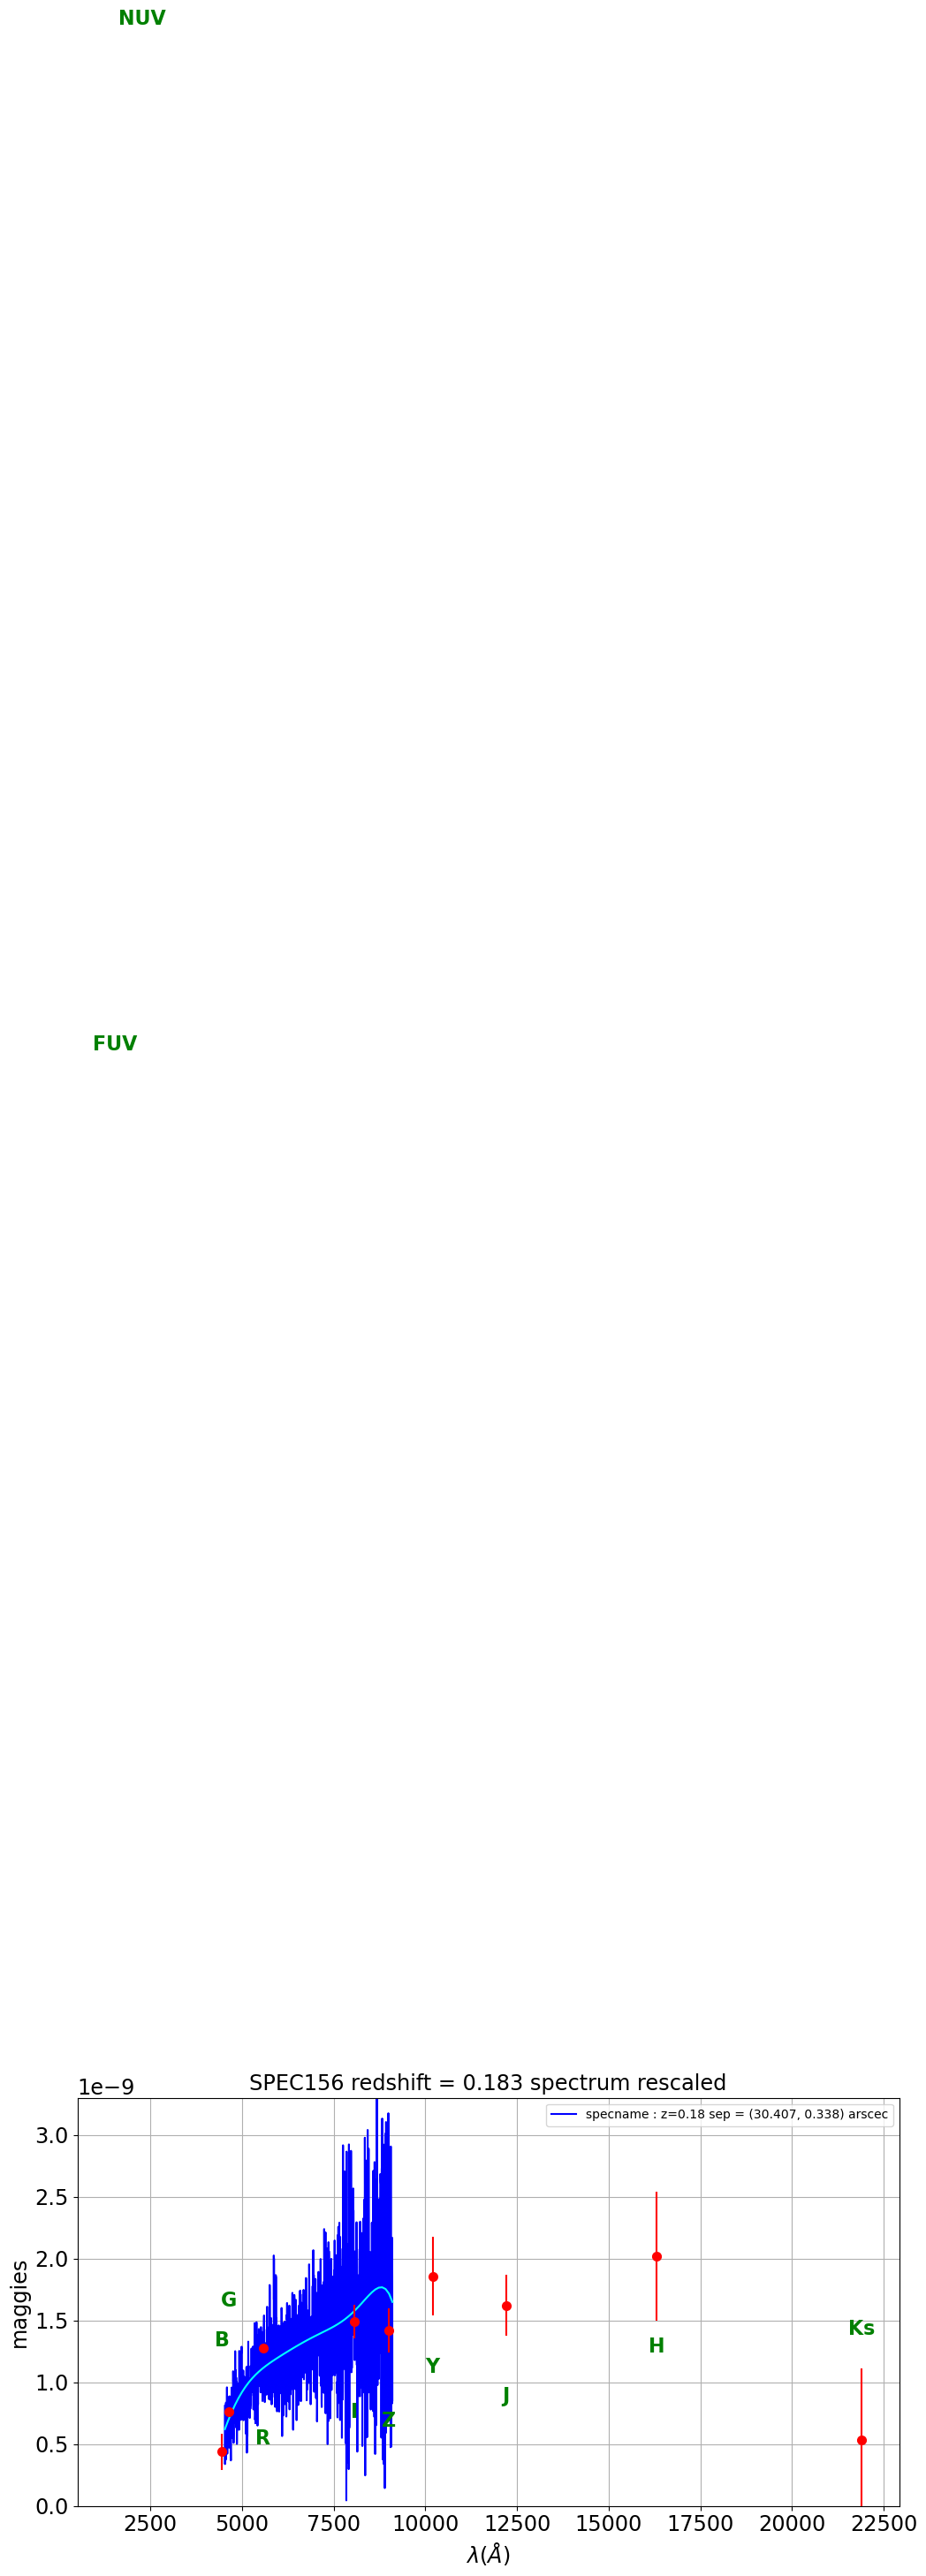

/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


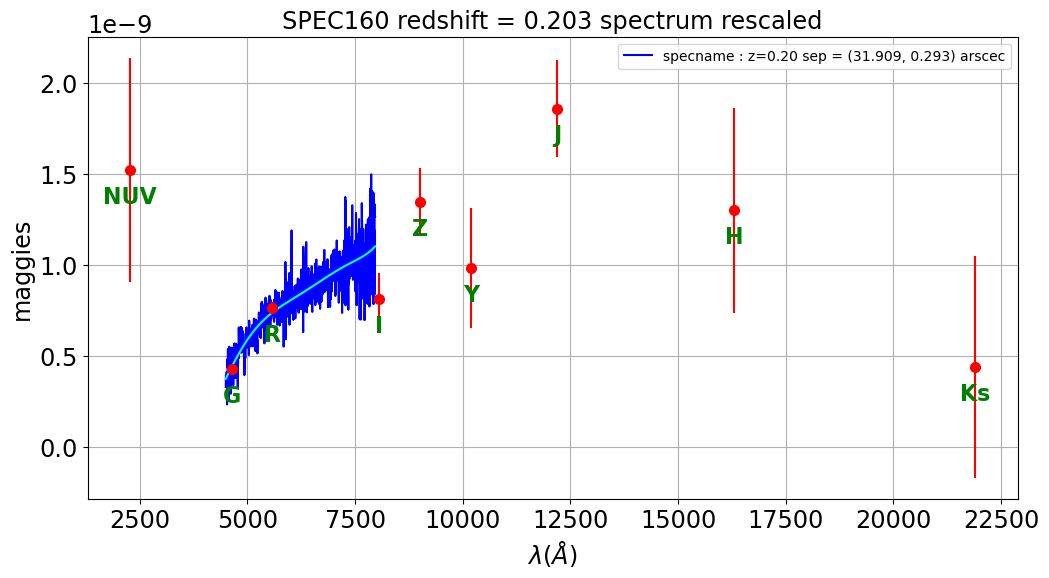

/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


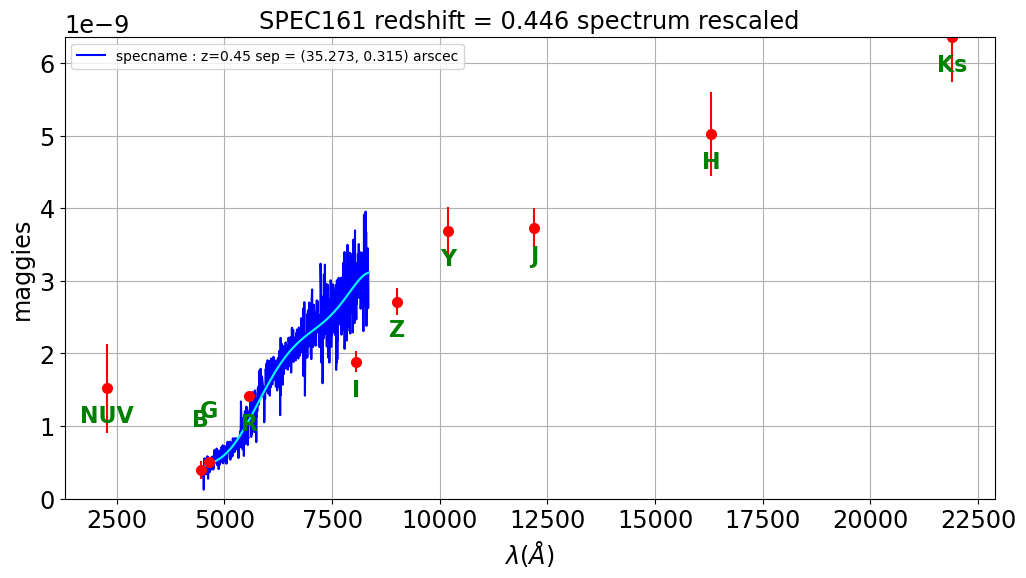

/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


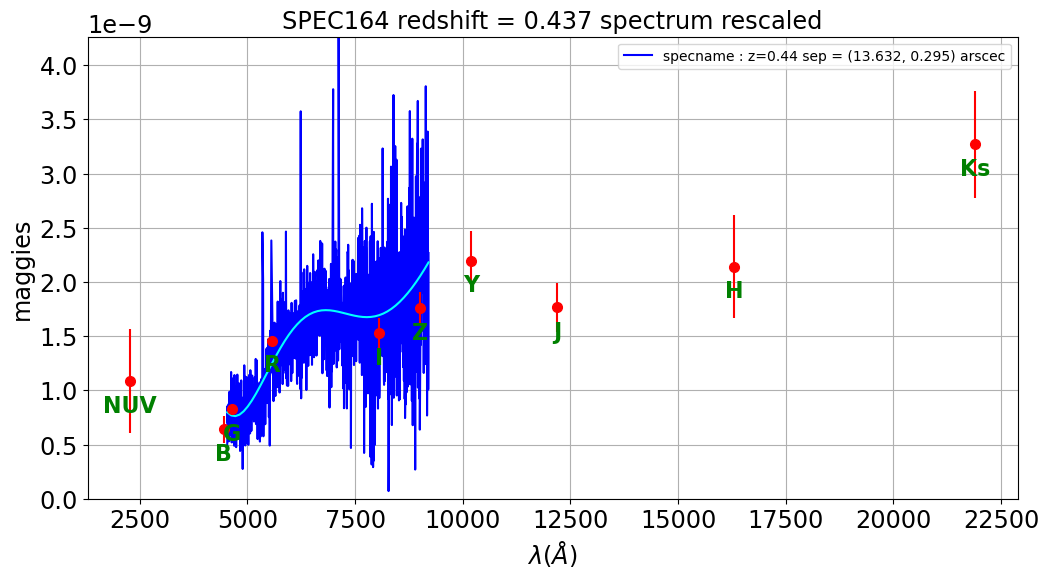

/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


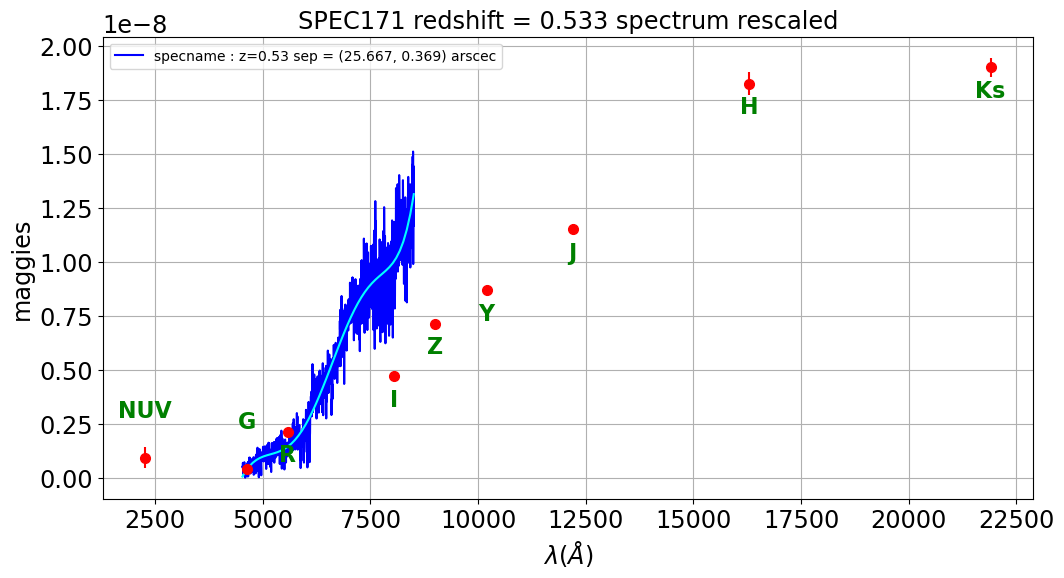

/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


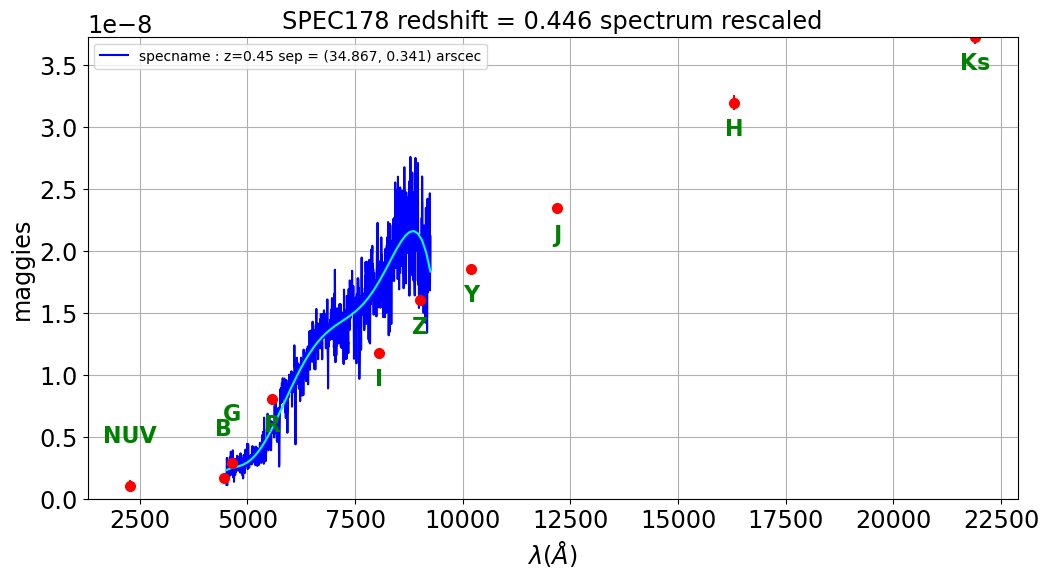

/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


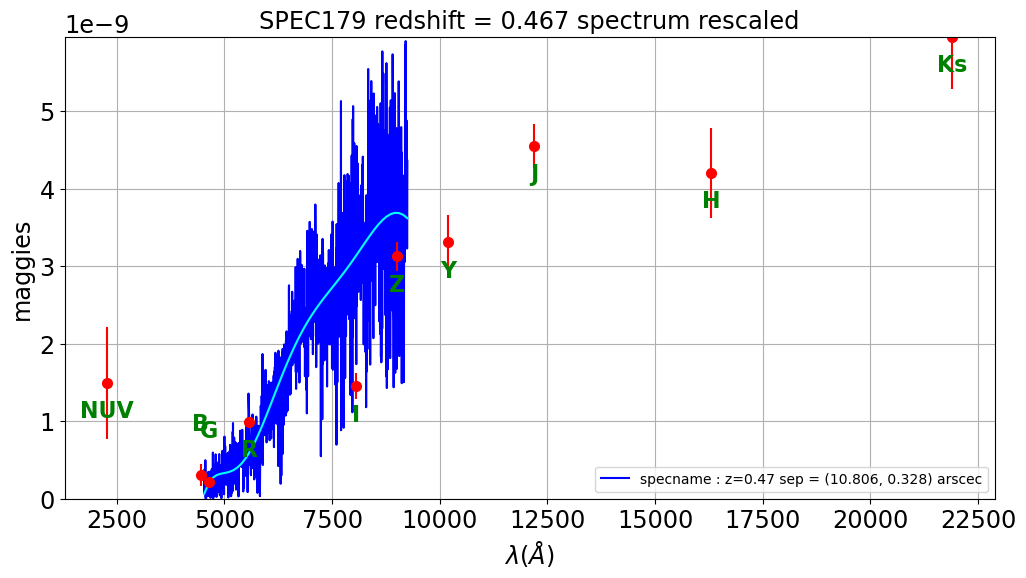

/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


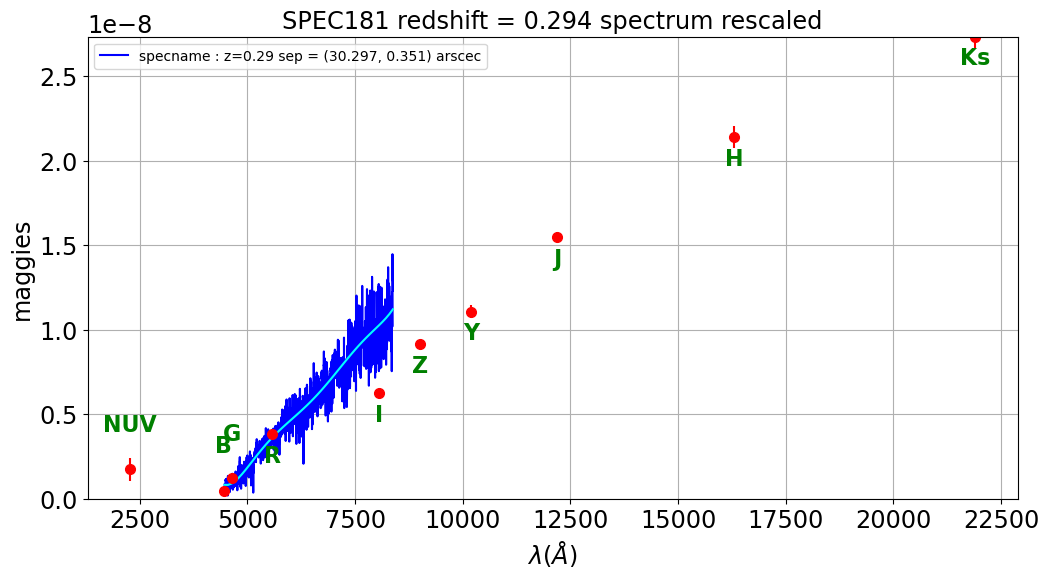

/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 6000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


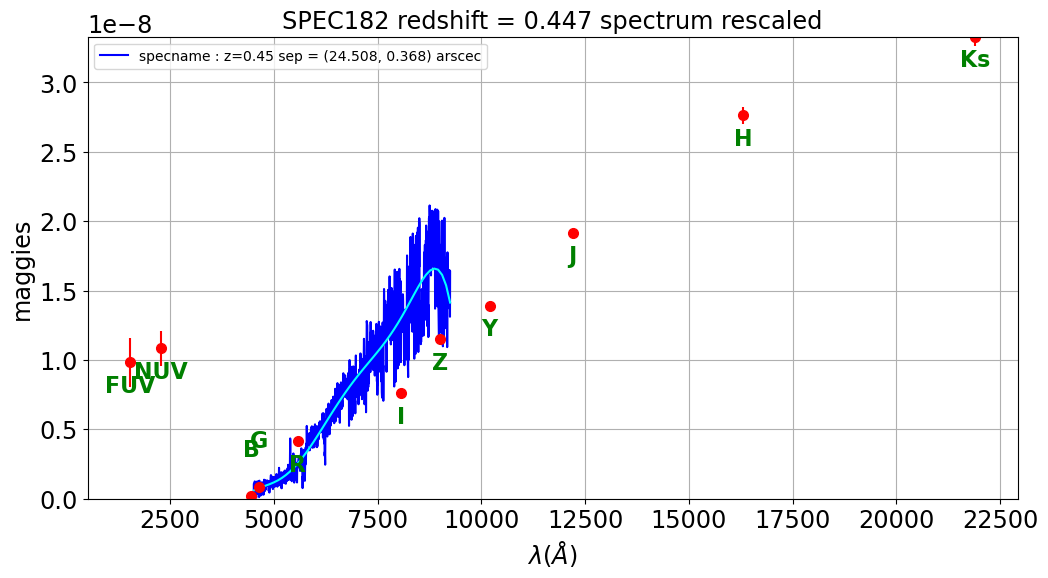

/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/dagoret/anaconda3/envs/pcigale/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


ValueError: Input y contains NaN.

In [8]:
for specname in fors2_tags:
    fors2.plot_spectro_photom_rescaling(specname)